# Analyse einer Twitter-Abfrage zun Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets

os.chdir("../my_data")
file_tw = 'Merged_TW' 
file_rt = 'Merged_RT'
tweets_df = pd.read_csv(file_tw + '.csv')
retweets_df = pd.read_csv(file_rt + '.csv')

In [39]:
print('twets shape: ',tweets_df.shape)
print('retwets shape: ',retweets_df.shape)

twets shape:  (2696, 19)
retwets shape:  (1723, 20)


### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

### * Tweets

In [3]:
# 1000 Gesammelte Tweets
## Primärschlüssel tweet_id
print(tweets_df.shape)
print(type(tweets_df))
tweets_df.head(100)

(2696, 19)
<class 'pandas.core.frame.DataFrame'>


Unnamed: 0  Unnamed: 0.1             tweet_id  \
0            0             0  1374637309346377729   
1            1             1  1374637039086309382   
2            2             2  1374636982236803072   
3            3             3  1374636919041179650   
4            4             4  1374636604963315712   
5            5             5  1374636148279156736   
6            6             6  1374636077311475712   
7            7             7  1374635927730020352   
8            8             8  1374635858054295554   
9            9             9  1374635757869088770   
10          10            10  1374635729461116932   
11          11            11  1374635710800613376   
12          12            12  1374635598271676417   
13          13            13  1374635580093472768   
14          14            14  1374635571730132992   
15          15            15  1374635527564103681   
16          16            16  1374635501211254786   
17          17            17  1374635423054594048   
18          18            18  1374635416687632384   
19          19            19  1374635391324729345   
20          20            20  1374635386845167616   
21          21            21  1374635206368489472   
22          22            22  1374634934741139462   
23          23            23  1374634779027587072   
24          24            24  1374634490027511808   
25          25            25  1374634427205132289   
26          26            26  1374634344145371137   
27          27            27  1374634131171213314   
28          28            28  1374633702152544264   
29          29            29  1374633573060374528   
..         ...           ...                  ...   
70          70            70  1374628320806121472   
71          71            71  1374628319698812929   
72          72            72  1374628301696864256   
73          73            73  1374628239507922949   
74          74            74  1374628154392870913   
75          75            75  1374627763211108354   
76          76            76  1374627641404260359   
77          77            77  1374627498001100804   
78          78            78  1374627381810503680   
79          79            79  1374627138729545728   
80          80            80  1374627010673324032   
81          81            81  1374626497009442824   
82          82            82  1374626421453246466   
83          83            83  1374626345217560576   
84          84            84  1374626336787021830   
85          85            85  1374626252255068160   
86          86            86  1374626237616824320   
87          87            87  1374626160525635586   
88          88            88  1374626082108944384   
89          89            89  1374625942765776896   
90          90            90  1374625912495439878   
91          91            91  1374625857025806336   
92          92            92  1374625827640446978   
93          93            93  1374625726138355713   
94          94            94  1374625703493308416   
95          95            95  1374625692009250816   
96          96            96  1374625670806966272   
97          97            97  1374625626783584262   
98          98            98  1374625577441824770   
99          99            99  1374625460559171589   

                     creation_date  \
0   Wed Mar 24 08:20:48 +0000 2021   
1   Wed Mar 24 08:19:44 +0000 2021   
2   Wed Mar 24 08:19:30 +0000 2021   
3   Wed Mar 24 08:19:15 +0000 2021   
4   Wed Mar 24 08:18:00 +0000 2021   
5   Wed Mar 24 08:16:11 +0000 2021   
6   Wed Mar 24 08:15:54 +0000 2021   
7   Wed Mar 24 08:15:19 +0000 2021   
8   Wed Mar 24 08:15:02 +0000 2021   
9   Wed Mar 24 08:14:38 +0000 2021   
10  Wed Mar 24 08:14:32 +0000 2021   
11  Wed Mar 24 08:14:27 +0000 2021   
12  Wed Mar 24 08:14:00 +0000 2021   
13  Wed Mar 24 08:13:56 +0000 2021   
14  Wed Mar 24 08:13:54 +0000 2021   
15  Wed Mar 24 08:13:43 +0000 2021   
16  Wed Mar 24 08:13:37 +0000 2021   
17  Wed Mar 24 08:13:19 +0000 202

In [4]:
tweets_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'creation_date', 'full_text',
       'mentions', 'entities_hashtags', 'user_name', 'user_screen_name',
       'user_id', 'location', 'description', 'protected', 'followers_count',
       'friends_count', 'profile_created_at', 'retweet_count',
       'favourite_count', 'search_key'],
      dtype='object')

In [5]:
#Filter
tw_rtcount = tweets_df[tweets_df['retweet_count'] >= 1]
tw_rtcount

Unnamed: 0  Unnamed: 0.1             tweet_id  \
0              0             0  1374637309346377729   
1              1             1  1374637039086309382   
3              3             3  1374636919041179650   
5              5             5  1374636148279156736   
7              7             7  1374635927730020352   
9              9             9  1374635757869088770   
10            10            10  1374635729461116932   
11            11            11  1374635710800613376   
13            13            13  1374635580093472768   
15            15            15  1374635527564103681   
16            16            16  1374635501211254786   
17            17            17  1374635423054594048   
18            18            18  1374635416687632384   
19            19            19  1374635391324729345   
20            20            20  1374635386845167616   
21            21            21  1374635206368489472   
23            23            23  1374634779027587072   
24            24            24  1374634490027511808   
25            25            25  1374634427205132289   
26            26            26  1374634344145371137   
27            27            27  1374634131171213314   
28            28            28  1374633702152544264   
29            29            29  1374633573060374528   
31            31            31  1374633345292902400   
32            32            32  1374633266125361153   
33            33            33  1374633150492463104   
34            34            34  1374633037305053184   
35            35            35  1374633034947911682   
36            36            36  1374633015855493125   
37            37            37  1374632945152094209   
...          ...           ...                  ...   
2580        2580            30  1374031804210900992   
2581        2581            31  1374031788109000704   
2582        2582            32  1374031776813740036   
2583        2583            33  1374031759193468928   
2584        2584            34  1374031749269712896   
2585        2585            35  1374031684266455043   
2586        2586            36  1374031650829398017   
2587        2587            37  1374031630487097348   
2588        2588            38  1374031581250121736   
2589        2589            39  1374031509892460544   
2590        2590            40  1374030757744713730   
2595        2595            45  1373848209378869248   
2615        2615            65  1373337273517838336   
2627        2627            77  1373088553144610817   
2630        2630            80  1372922363688402947   
2631        2631            81  1372919881692286981   
2636        2636            86  1372717187400671234   
2637        2637            87  1372716192805355520   
2646        2646            96  1372570989784047616   
2668        2668           118  1372204966702682118   
2674        2674           124  1372061411740839940   
2675        2675           125  1371980794911133696   
2677        2677           127  1371936127649730562   
2680        2680           130  1371882428390895627   
2681        2681           131  1371874558513385477   
2684        2684           134  1371844708683632640   
2685        2685           135  1371844081245126658   
2690        2690           140  1371742794641981440   
2691        2691           141  1371741973925797890   
2692        2692           142  1371740160761679875   

                       creation_date  \
0     Wed Mar 24 08:20:48 +0000 2021   
1     Wed Mar 24 08:19:44 +0000 2021   
3     Wed Mar 24 08:19:15 +0000 2021   
5     Wed Mar 24 08:16:11 +0000 2021   
7     Wed Mar 24 08:15:19 +0000 2021   
9     Wed Mar 24 08:14:38 +0000 2021   
10    Wed Mar 24 08:14:32 +0000 2021   
11    Wed Mar 24 08:14:27 +0000 2021   
13    Wed Mar 24 08:13:56 +0000 2021   
15    Wed Mar 24 08:13:43 +0000 2021   
16    Wed Mar 24 08:13:37 +0000 2021   
17    Wed Mar 24 08:13:19 +0000 2021   
18    Wed Mar 24 08:13:17 +0000 2021   
19    Wed Mar 24 08:13:11 +0000 202

In [6]:
# Filter
id_tw = 1372585147183239170
tweets_filt = tweets_df.loc[tweets_df['tweet_id'] == id_tw]
tweets_filt

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, tweet_id, creation_date, full_text, mentions, entities_hashtags, user_name, user_screen_name, user_id, location, description, protected, followers_count, friends_count, profile_created_at, retweet_count, favourite_count, search_key]
Index: []

In [7]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 2110 
-> ihre tweets 2645 
-> followers max 49690042 avg 52185.8015578635 median 515.5 
-> friends max 333139 
-> gefällt mir max 10754 median 0.0


### * Retweets

In [8]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(1723, 20)


Unnamed: 0  Unnamed: 0.1             tweet_id  \
0           0             0  1377138218387169284   
1           1             1  1377102038090190849   
2           2             2  1376965400898891777   

                    creation_date  \
0  Wed Mar 31 05:58:31 +0000 2021   
1  Wed Mar 31 03:34:45 +0000 2021   
2  Tue Mar 30 18:31:49 +0000 2021   

                                           full_text    mentions  \
0  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
1  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
2  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   

  entities_hashtags               user_name user_screen_name     user_id  \
0                []           Lisa Thompson   thegaudidragon   389070232   
1                []  Lance Link Resists 🙈🙉🙊  LancelotLinkSpy  2502992592   
2                []           Maureen Gough         toranada    86248360   

        location                                        description  \
0     Manchester                                                NaN   
1  United States  Brought Back From The Cold War! \n#ResistFasci...   
2         Canada       Love all animals and can not tolerate abuse!   

   protected  followers_count  friends_count              profile_created_at  \
0      False              395            203  Tue Oct 11 20:15:10 +0000 2011   
1      False            27081          28139  Sun May 18 01:29:47 +0000 2014   
2      False              665            707  Fri Oct 30 05:38:23 +0000 2009   

   retweet_count  favourite_count             RT_of_ID search_key  
0             42                0  1376807909930188803     #vegan  
1             42                0  1376807909930188803     #vegan  
2             42                0  1376807909930188803     #vegan

In [9]:
retweets_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'creation_date', 'full_text',
       'mentions', 'entities_hashtags', 'user_name', 'user_screen_name',
       'user_id', 'location', 'description', 'protected', 'followers_count',
       'friends_count', 'profile_created_at', 'retweet_count',
       'favourite_count', 'RT_of_ID', 'search_key'],
      dtype='object')

In [10]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 1321 
-> ihre retweets 1569 
-> retweets Median 30.0  nur 10% haben mehr als 88.0  retweets  - max 464 
-> followers max 1081206  nur 10% haben mehr als  5466.599999999999 followers 
-> friends max 70705


### * Merged

In [11]:
# Joinen der beiden DF mit Left-Join 
#df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
#df.head(3)

In [12]:
# Joinen
df = pd.merge(tweets_df, retweets_df, left_on='tweet_id', right_on='RT_of_ID')
df.head(3)

Unnamed: 0_x  Unnamed: 0.1_x           tweet_id_x  \
0             7               7  1374635927730020352   
1             7               7  1374635927730020352   
2             7               7  1374635927730020352   

                  creation_date_x  \
0  Wed Mar 24 08:15:19 +0000 2021   
1  Wed Mar 24 08:15:19 +0000 2021   
2  Wed Mar 24 08:15:19 +0000 2021   

                                         full_text_x mentions_x  \
0  A simple answer to this is to choose 2b #Vegan...         []   
1  A simple answer to this is to choose 2b #Vegan...         []   
2  A simple answer to this is to choose 2b #Vegan...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x  ...  \
0           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   
1           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   
2           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   

  location_y                                      description_y  protected_y  \
0        NaN  I love all animals n have no time for people w...        False   
1        NaN                                                NaN        False   
2        NaN                                                NaN        False   

   followers_count_y  friends_count_y            profile_created_at_y  \
0                969              925  Fri Feb 25 20:41:12 +0000 2011   
1               1243             2333  Thu Nov 09 23:40:41 +0000 2017   
2                187              425  Tue Jan 26 19:14:09 +0000 2016   

   retweet_count_y  favourite_count_y             RT_of_ID  search_key_y  
0               34                  0  1374635927730020352        #vegan  
1               34                  0  1374635927730020352        #vegan  
2               34                  0  1374635927730020352        #vegan  

[3 rows x 39 columns]

In [13]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'tweet_id_x', 'creation_date_x',
       'full_text_x', 'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y', 'tweet_id_y',
       'creation_date_y', 'full_text_y', 'mentions_y', 'entities_hashtags_y',
       'user_name_y', 'user_screen_name_y', 'user_id_y', 'location_y',
       'description_y', 'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [14]:
df.describe()

Unnamed: 0_x  Unnamed: 0.1_x    tweet_id_x     user_id_x  \
count   2280.000000     2280.000000  2.280000e+03  2.280000e+03   
mean    1828.245614       33.836842  1.374259e+18  1.041645e+17   
std      812.735916       50.735915  1.451833e+15  3.406113e+17   
min        7.000000        0.000000  1.371462e+18  8.070950e+05   
25%     1986.500000        8.000000  1.373734e+18  1.724321e+07   
50%     2246.000000       17.000000  1.374059e+18  4.955115e+07   
75%     2274.000000       31.000000  1.374636e+18  4.521009e+08   
max     2492.000000      249.000000  1.377258e+18  1.376579e+18   

       followers_count_x  friends_count_x  retweet_count_x  favourite_count_x  \
count       2.280000e+03      2280.000000      2280.000000        2280.000000   
mean        1.006322e+06     10307.054386        50.435088         325.199561   
std         4.493364e+06     18779.352390        61.404665         765.409614   
min         1.000000e+00         0.000000         1.000000           0.000000   
25%         4.245300e+04       904.000000        20.750000          53.000000   
50%         1.223760e+05      5030.000000        34.000000         103.000000   
75%         1.081081e+06      7907.000000        58.000000         265.000000   
max         4.969004e+07    154441.000000       464.000000        5923.000000   

       Unnamed: 0_y  Unnamed: 0.1_y    tweet_id_y     user_id_y  \
count   2280.000000     2280.000000  2.280000e+03  2.280000e+03   
mean     864.548246      230.777632  1.374508e+18  4.920610e+17   
std      479.444094      197.962174  1.408852e+15  5.690404e+17   
min        0.000000        0.000000  1.371462e+18  6.634632e+06   
25%      471.750000       62.000000  1.373995e+18  3.381257e+08   
50%      892.500000      184.000000  1.374288e+18  3.077488e+09   
75%     1268.250000      350.000000  1.374771e+18  1.114424e+18   
max     1722.000000      766.000000  1.377267e+18  1.375985e+18   

       followers_count_y  friends_count_y  retweet_count_y  favourite_count_y  \
count       2.280000e+03      2280.000000      2280.000000             2280.0   
mean        3.580326e+03      1704.798246        51.318860                0.0   
std         2.958627e+04      4016.515161        61.714417                0.0   
min         0.000000e+00         0.000000         1.000000                0.0   
25%         8.800000e+01       180.000000        21.000000                0.0   
50%         3.585000e+02       518.000000        34.000000                0.0   
75%         1.393500e+03      1872.000000        58.000000                0.0   
max         1.081206e+06     70705.000000       464.000000                0.0   

           RT_of_ID  
count  2.280000e+03  
mean   1.374259e+18  
std    1.451833e+15  
min    1.371462e+18  
25%    1.373734e+18  
50%    1.374059e+18  
75%    1.374636e+18  
max    1.377258e+18

In [15]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [16]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

Unnamed: 0_x  Unnamed: 0.1_x           tweet_id_x  \
120           100               0  1376807909930188803   
121           100               0  1376807909930188803   

                    creation_date_x  \
120  Tue Mar 30 08:06:00 +0000 2021   
121  Tue Mar 30 08:06:00 +0000 2021   

                                           full_text_x mentions_x  \
120  Animal agriculture is responsible for a greate...         []   
121  Animal agriculture is responsible for a greate...         []   

       entities_hashtags_x user_name_x user_screen_name_x  user_id_x  ...  \
120  ['vegan', 'Heatwave']     PETA UK             PETAUK  357584312  ...   
121  ['vegan', 'Heatwave']     PETA UK             PETAUK  357584312  ...   

        location_y                                      description_y  \
120     Manchester                                                NaN   
121  United States  Brought Back From The Cold War! \n#ResistFasci...   

     protected_y  followers_count_y  friends_count_y  \
120        False                395              203   
121        False              27081            28139   

               profile_created_at_y  retweet_count_y  favourite_count_y  \
120  Tue Oct 11 20:15:10 +0000 2011               42                  0   
121  Sun May 18 01:29:47 +0000 2014               42                  0   

                RT_of_ID  search_key_y  
120  1376807909930188803        #vegan  
121  1376807909930188803        #vegan  

[2 rows x 39 columns]

In [17]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

Unnamed: 0  Unnamed: 0.1             tweet_id  \
0           0             0  1377138218387169284   
1           1             1  1377102038090190849   

                    creation_date  \
0  Wed Mar 31 05:58:31 +0000 2021   
1  Wed Mar 31 03:34:45 +0000 2021   

                                           full_text    mentions  \
0  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   
1  RT @PETAUK: Animal agriculture is responsible ...  ['PETAUK']   

  entities_hashtags               user_name user_screen_name     user_id  \
0                []           Lisa Thompson   thegaudidragon   389070232   
1                []  Lance Link Resists 🙈🙉🙊  LancelotLinkSpy  2502992592   

        location                                        description  \
0     Manchester                                                NaN   
1  United States  Brought Back From The Cold War! \n#ResistFasci...   

   protected  followers_count  friends_count              profile_created_at  \
0      False              395            203  Tue Oct 11 20:15:10 +0000 2011   
1      False            27081          28139  Sun May 18 01:29:47 +0000 2014   

   retweet_count  favourite_count             RT_of_ID search_key  
0             42                0  1376807909930188803     #vegan  
1             42                0  1376807909930188803     #vegan

## Auswertung TW

In [18]:
# Defintion des Anteils
viele = 0.8


# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol


user_id                            user_name  \
2273               807095                   The New York Times   
1182              2883841                              E! News   
2242             86254626                       Preity G Zinta   
2226             15808765                          Cory Booker   
2235             17243213          Recording Academy / GRAMMYs   
2246            173195708                       Nigella Lawson   
2238             15947602                           Change.org   
2250           4020532937                                Tasty   
102              41707730                    NYX Pro Makeup US   
2257             14464766                             moby XⓋX   
101               9890492                                 PETA   
2249             40851965                     Stella McCartney   
103             113560280                         Mayim Bialik   
2266            339061487                               Pomp 🌪   
2227            302111485                          Enes Kanter   
1800           1573265498                              FINNEAS   
2228             22956018                           jann arden   
2254           4805771380                         Food Insider   
2280            116579971                             Gad Saad   
2241            774187063                        BuzzFeed Food   
1358           2395996238         Promo for Artists & Business   
2243           1526321732                  Dr. Mike Varshavski   
2253             33787936                    Mercy For Animals   
2248             32184345                      Nicola Coughlan   
2626             84795529                             SBI Card   
1493             21754399                    The Vegan Society   
2256            394087611                 Dr. Angela Rasmussen   
638              21842061                       Stacye Branché   
2251             18027434                     Mark Hyman, M.D.   
2222             17396566                                Petco   
...                   ...                                  ...   
2528             90227591                     Bolele Polisa 👸🏾   
1719            764142572                         Karen Farber   
2364   867812457175240705           Maggie #IAmEuropean #FBPPR   
1495            118229983                       Markus Giesler   
1323           2797006147  Dr. Catrina™ #therealcatrinac 🤷🏽‍♀️   
2481            927742304                   Food Allergy Aware   
813            3091914488                     Dating Ace USA❤️   
893    955380392709820416                                  もふ☁   
2377             18582518                           Al Kennedy   
87              426932008                 FriendshipVeganShoes   
1807           3044872221                       Vegan Goodness   
2198   883325323491901441                        David Whinray   
1378   886005706016649219                            (｡•́︿•̀｡)   
549    896496644656685056                     Georgia Garrison   
2310  1166184584981045248                    Anima Gitane ☮🌈☯️   
2329            740232235                             Purearth   
1779            151885500                               SPIRIT   
1394             17917717                       Hail Seitan ☭🐬   
2494  1224277540036104192                           Anna Borek   
1908           2915521179                 Hannah Hossack-Lodge   
665             117081872                         Ana Eskudero   
2381  1004872985612771328                                Anmol   
1923           2713841670                                  LⓋD   
472             138597964     Rogue One V #GTTO🦉🦊🐺🕷️🕸️💚💙#MMT🇵🇸   
96               17306850                         porridgelady   
627             731266728                  Gossip In Hollywood   
2367            135535509                    Fairtrade Ireland   
2108             94900143               Natalie Lanoville 🇨🇦 🌱   
157    932239981657108480                    CarbonCraft L

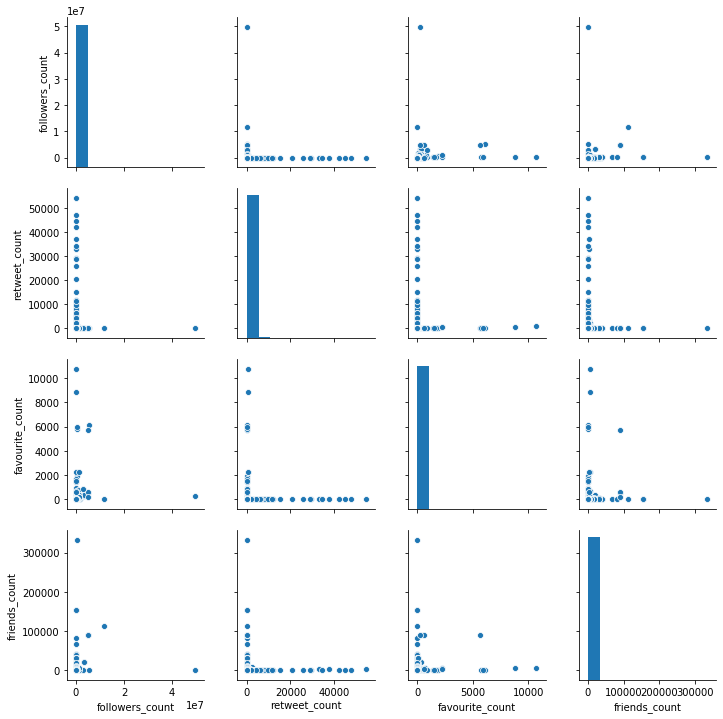

In [19]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

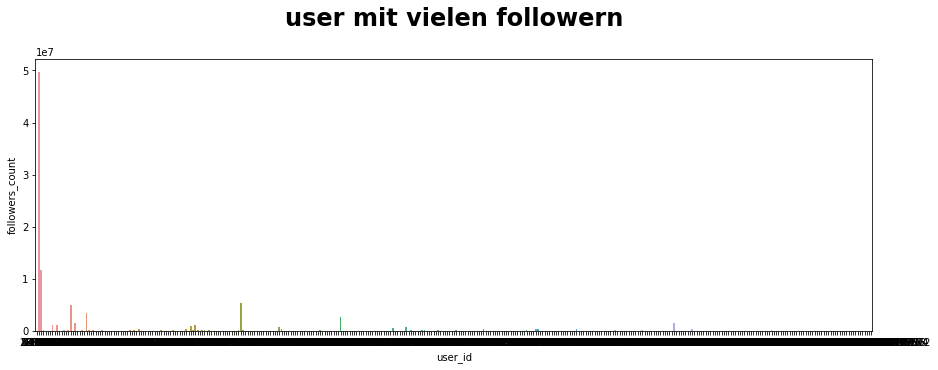

In [20]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [21]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour.head()

user_id             user_name  followers_count  retweet_count  \
2222   17396566                 Petco           179102            653   
2242   86254626        Preity G Zinta          5362233            168   
2248   32184345       Nicola Coughlan           265865            131   
2257   14464766              moby XⓋX          1159108            464   
2256  394087611  Dr. Angela Rasmussen           209339            503   

      favourite_count  friends_count  
2222             8812           5602  
2242             6127            108  
2248             5785           1365  
2257             2232           1992  
2256             2224           4848

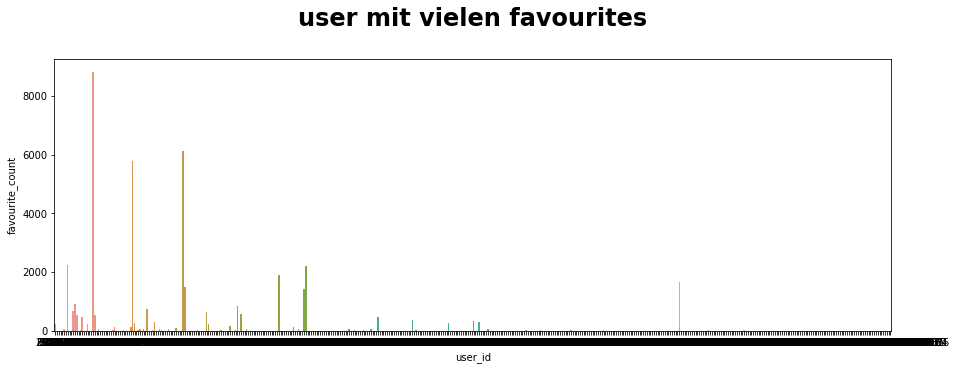

In [22]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="favourite_count", data=df_favour)

In [23]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret.head()

user_id         user_name  followers_count  retweet_count  \
1037  1202264747539718144  𝒥𝒶𝓃𝒶𝓇𝒶✨ʳᵉˢᵗ`ᵉˣᵃᵐ             1541          54333   
873   1170025054261993473             Winsh              300          47436   
1112   801275328920309760                B🍍              164          44914   
1075           2342316112             kenzi              372          34495   
972   1342468257039732740    Nabila Suleman               98          29257   

      favourite_count  friends_count  
1037                0           1514  
873                 0            211  
1112                0            128  
1075                0            387  
972                 0             87

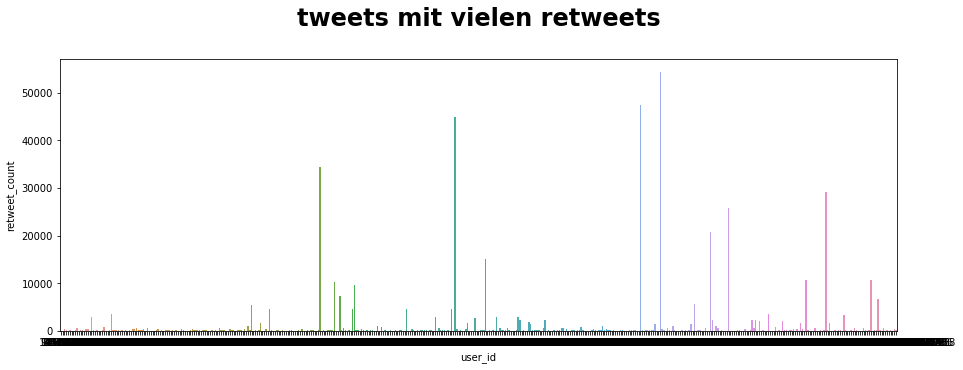

In [24]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¶

In [25]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends.head()

user_id                     user_name  followers_count  \
1358  2395996238  Promo for Artists & Business           309977   
638     21842061                Stacye Branché           196447   
1182     2883841                       E! News         11778536   
2226    15808765                   Cory Booker          4963061   
399    506007359                    Animals1st            98353   

      retweet_count  favourite_count  friends_count  
1358              0                0         333139  
638               1                2         154441  
1182              1                5         112693  
2226             68              550          89022  
399               9                0          81822

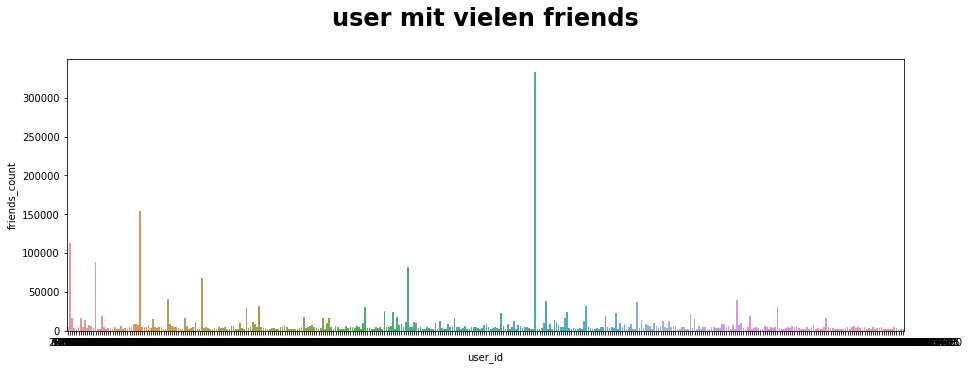

In [26]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="friends_count", data=df_friends)

## Auswertung RT

In [27]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

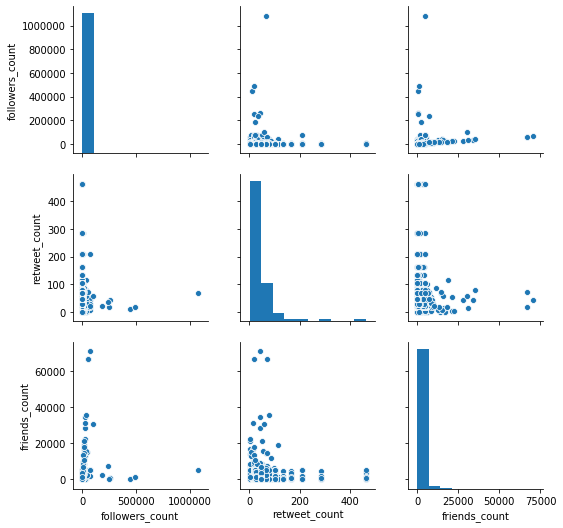

In [28]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

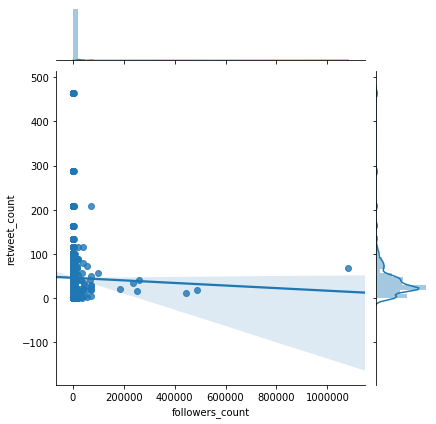

In [29]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

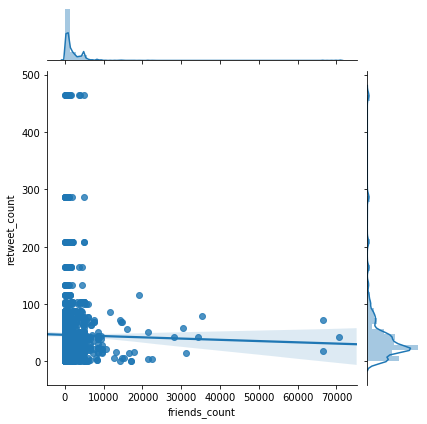

In [30]:

ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

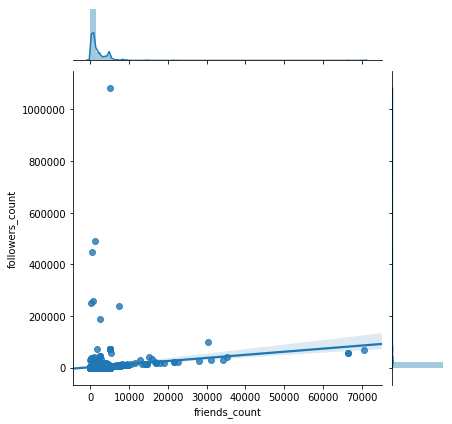

In [31]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

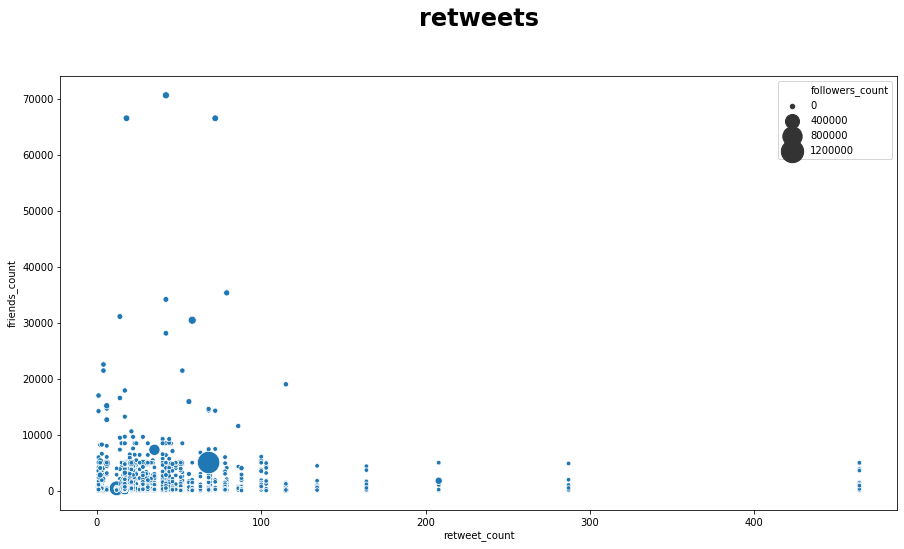

In [32]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [33]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

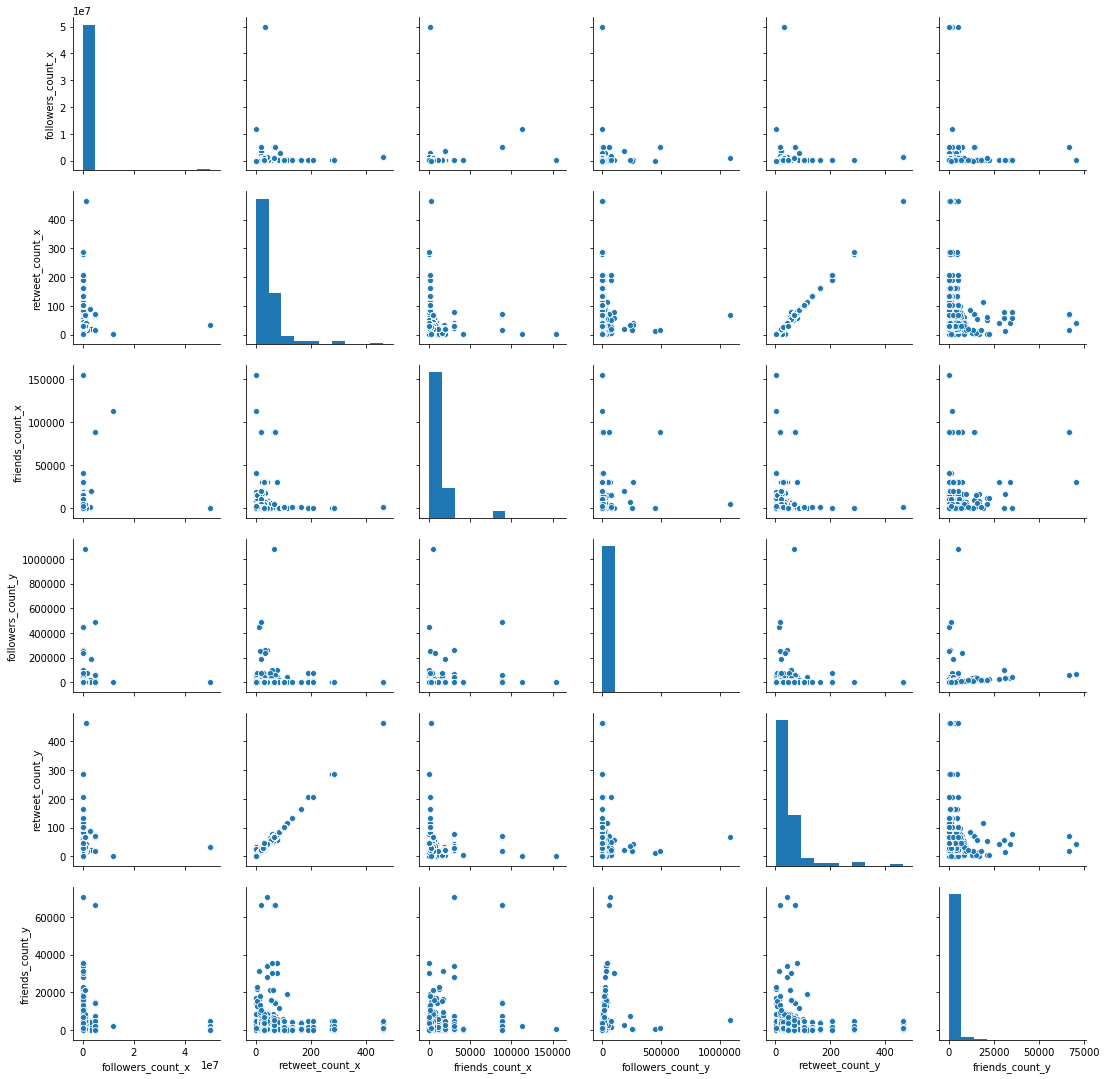

In [34]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)

## Networkx with Python

In [41]:
import networkx as nx
import warnings

In [42]:
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'tweet_id_x', 'creation_date_x',
       'full_text_x', 'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'Unnamed: 0.1_y', 'tweet_id_y',
       'creation_date_y', 'full_text_y', 'mentions_y', 'entities_hashtags_y',
       'user_name_y', 'user_screen_name_y', 'user_id_y', 'location_y',
       'description_y', 'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [43]:
pd.DataFrame(df, columns=['user_id_x','retweet_count_x','user_id_y','retweet_count_y'])

user_id_x  retweet_count_x            user_id_y  retweet_count_y
0     452100948                1            257621562               34
1     452100948                1   928769342438768640               34
2     452100948                1           4850855200               34
3     452100948                1           2439664891               34
4     452100948                1   941488283405631488               34
5     452100948                1            296946018               34
6     452100948                1   834086533619646464               34
7     452100948                1            150398468               34
8     452100948                1             41080011               34
9     452100948                1   906541230506606593               34
10    452100948                1           2647210962               34
11    452100948                1            149099859               34
12    452100948                1           4373188702               34
13    452100948                1            417744294               34
14    452100948                1             85659105               34
15    452100948                1  1243144095608057856               34
16    452100948                1  1149238337426919424               34
17    452100948                1           1446746202               34
18    452100948                1           2645357155               34
19    452100948                1  1345894556802408448               34
20    452100948                1           2647210962               24
21    452100948                1            149099859               24
22    452100948                1           4373188702               24
23    452100948                1            417744294               24
24    452100948                1             85659105               24
25    452100948                1  1243144095608057856               24
26    452100948                1  1149238337426919424               24
27    452100948                1           1446746202               24
28    452100948                1           2645357155               24
29    452100948                1  1345894556802408448               24
...         ...              ...                  ...              ...
2250  189088175               28           3338720746               28
2251  189088175               28  1252927325429260289               28
2252  189088175               28             22361496               28
2253  189088175               28            570643724               28
2254  189088175               28            274647532               28
2255  189088175               28             30419444               28
2256  189088175               28             88735550               28
2257  189088175               28  1356717520577822723               28
2258  189088175               28  1334078106018209792               28
2259  189088175               28             77188689               28
2260  192536259               29           2935167860               46
2261  192536259               29            170611341               46
2262  192536259               29  1332251973446340608               46
2263  192536259               29             40204749               46
2264  192536259               29  1042721517400842240               46
2265  192536259               29           2231186966               46
2266  192536259               29  1291168213204533248               46
2267  192536259               29  1177448589468942336               46
2268  192536259               29            375123563               46
2269  192536259               29           2889428046               46
2270  192536259               29   987953492210794496               46
2271  192536259               29  1067021790004670465               46
2272  192536259               29           3266231197               46
2273  192536259               29           3308778702               46
2274  192536259               

In [44]:
df.head(3)

Unnamed: 0_x  Unnamed: 0.1_x           tweet_id_x  \
0             7               7  1374635927730020352   
1             7               7  1374635927730020352   
2             7               7  1374635927730020352   

                  creation_date_x  \
0  Wed Mar 24 08:15:19 +0000 2021   
1  Wed Mar 24 08:15:19 +0000 2021   
2  Wed Mar 24 08:15:19 +0000 2021   

                                         full_text_x mentions_x  \
0  A simple answer to this is to choose 2b #Vegan...         []   
1  A simple answer to this is to choose 2b #Vegan...         []   
2  A simple answer to this is to choose 2b #Vegan...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x  ...  \
0           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   
1           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   
2           ['Vegan']  Peter Egan         PeterEgan6  452100948  ...   

  location_y                                      description_y  protected_y  \
0        NaN  I love all animals n have no time for people w...        False   
1        NaN                                                NaN        False   
2        NaN                                                NaN        False   

   followers_count_y  friends_count_y            profile_created_at_y  \
0                969              925  Fri Feb 25 20:41:12 +0000 2011   
1               1243             2333  Thu Nov 09 23:40:41 +0000 2017   
2                187              425  Tue Jan 26 19:14:09 +0000 2016   

   retweet_count_y  favourite_count_y             RT_of_ID  search_key_y  
0               34                  0  1374635927730020352        #vegan  
1               34                  0  1374635927730020352        #vegan  
2               34                  0  1374635927730020352        #vegan  

[3 rows x 39 columns]

In [46]:
source = 'user_screen_name_x'
target = 'user_screen_name_y'

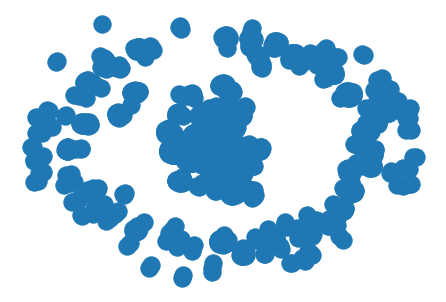

In [49]:
G = nx.from_pandas_edgelist(df, source=source, target=target, edge_attr=['user_name_x','location_x','retweet_count_x','description_x','followers_count_x','friends_count_x'])
nx.draw(G, with_labels=False)
plt.show()

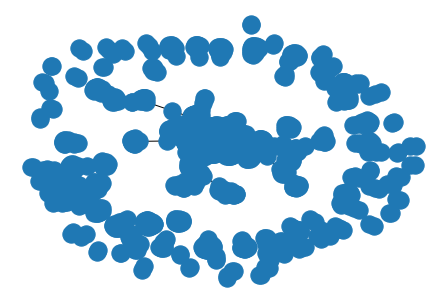

In [48]:
G = nx.from_pandas_edgelist(df, source=source, target=target, edge_attr='followers_count_y')
nx.draw(G, with_labels=False)
plt.show()

In [51]:
type(G)

networkx.classes.graph.Graph

In [52]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1489\nNumber of edges: 1464\nAverage degree:   1.9664'

In [53]:
G.nodes()

NodeView(('PeterEgan6', 'eve9tmp', 'Victori45792596', 'NathaliePhilli5', 'flloydthecat', '4N1m4l_l0v3R', 'ELAINEDAVIES2', 'MariaOD05737730', 'Bertietheking', 'Nightswan_1', 'LindsjoLotta', 'gudi27', 'chellleington', 'mariagreenie', 'Jan_Leeming', 'Mastino1111', 'Skeez73691291', 'RosemaryLedger', 'bibichase', '77deedd', 'GTK17107134', 'siwarr5', 'euanfar', 'powera372', 'BookzDoctor', 'KatWhyte2', 'LyndaMa15321927', 'Moehoffenstein', 'ANoiLaParola', 'RowenaKirkpatr5', 'goodandthegreat', 'PETAUK', 'thegaudidragon', 'LancelotLinkSpy', 'toranada', 'MarieDIAS7', 'CoolUkbreez', 'Eire353', 'AviFlyGirl', 'KayeAlfie', 'SevgiEkmekciler', 'kirthurgan', 'mokomokai', 'Superalimentos', 'YarosisNancy', 'animalpenpals', 'NicheTax', 'healing_energy4', 'pati_qs', 'peta', 'Ewa53013872', 'mongoose409', 'fiddy333', 'Elizabeth_NL', 'fatihyenilmez5', 'sherielk', 'createtime_', 'Carolinakitikin', 'Giovannaconfal6', 'OssoffWarnockGA', 'faktchekker', 'IFannyy', 'QueensOfWarrior', 'NyxCosmetics', 'Pinkpan26647255

In [54]:
len(G.nodes())

1489

### * Edges

In [55]:
G.edges()

EdgeView([('PeterEgan6', 'eve9tmp'), ('PeterEgan6', 'Victori45792596'), ('PeterEgan6', 'NathaliePhilli5'), ('PeterEgan6', 'flloydthecat'), ('PeterEgan6', '4N1m4l_l0v3R'), ('PeterEgan6', 'ELAINEDAVIES2'), ('PeterEgan6', 'MariaOD05737730'), ('PeterEgan6', 'Bertietheking'), ('PeterEgan6', 'Nightswan_1'), ('PeterEgan6', 'LindsjoLotta'), ('PeterEgan6', 'gudi27'), ('PeterEgan6', 'chellleington'), ('PeterEgan6', 'mariagreenie'), ('PeterEgan6', 'Jan_Leeming'), ('PeterEgan6', 'Mastino1111'), ('PeterEgan6', 'Skeez73691291'), ('PeterEgan6', 'RosemaryLedger'), ('PeterEgan6', 'bibichase'), ('PeterEgan6', '77deedd'), ('PeterEgan6', 'GTK17107134'), ('PeterEgan6', 'siwarr5'), ('PeterEgan6', 'euanfar'), ('PeterEgan6', 'powera372'), ('PeterEgan6', 'BookzDoctor'), ('PeterEgan6', 'KatWhyte2'), ('PeterEgan6', 'LyndaMa15321927'), ('PeterEgan6', 'Moehoffenstein'), ('PeterEgan6', 'ANoiLaParola'), ('PeterEgan6', 'RowenaKirkpatr5'), ('PeterEgan6', 'goodandthegreat'), ('Bertietheking', 'VeganPoet'), ('LindsjoLot

In [56]:
len(G.edges())

1464

### * Visualization

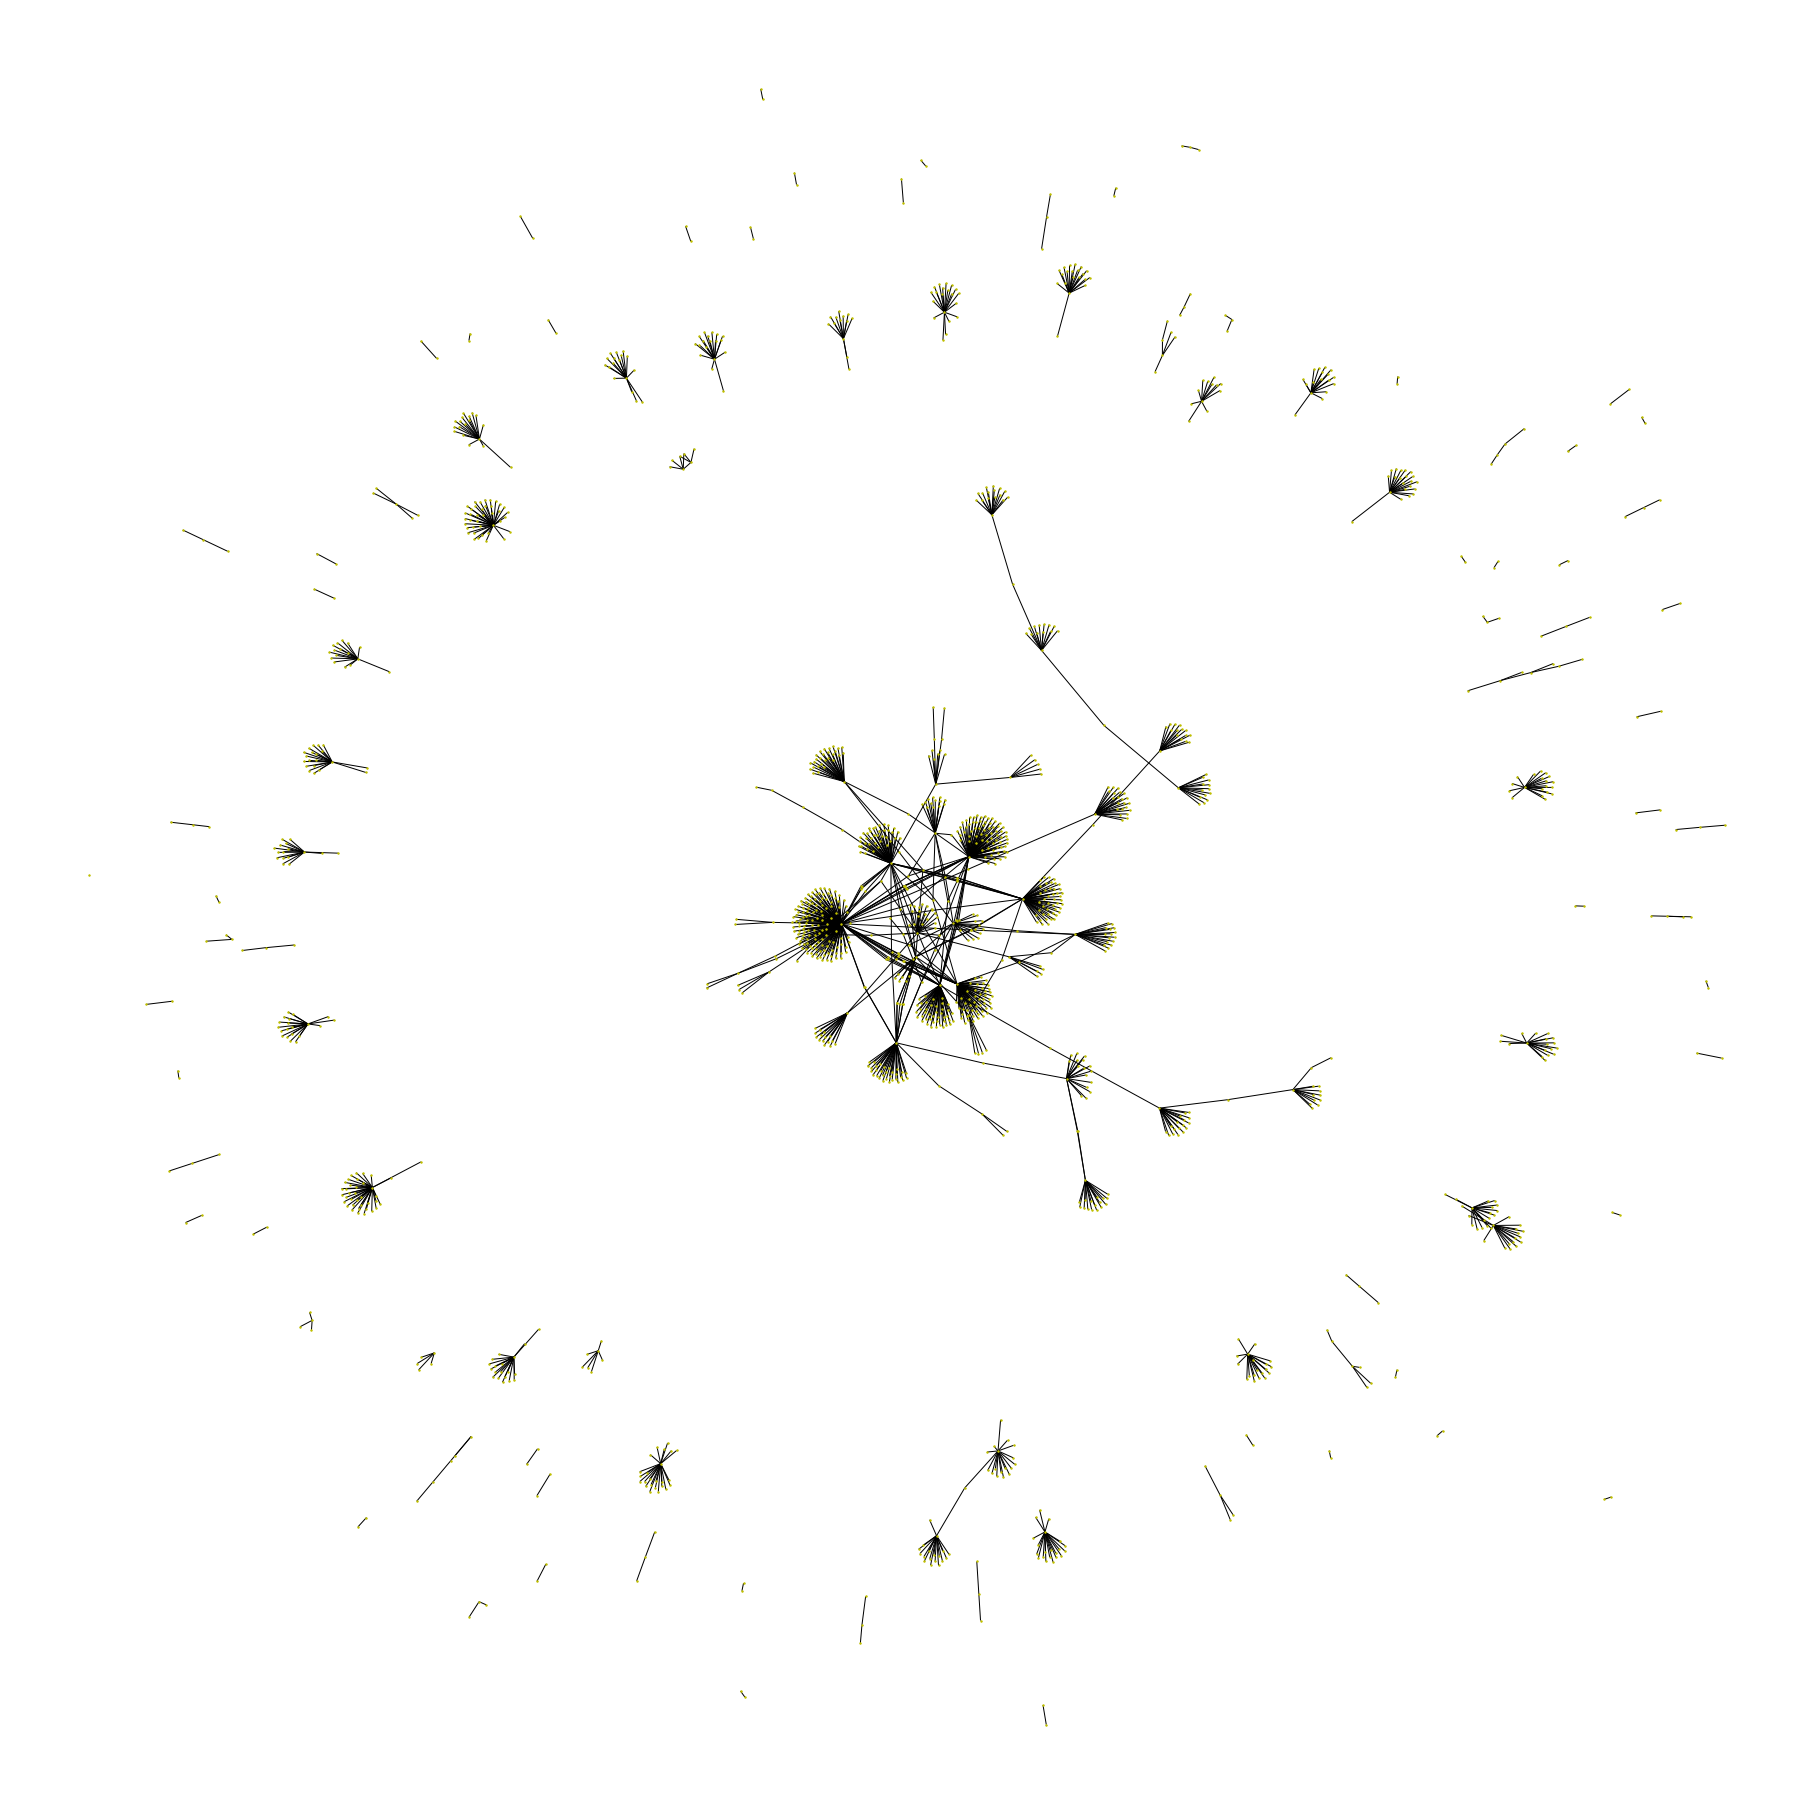

In [62]:
plt.figure(figsize=(25,25))
nx.draw(G, with_labels=False, node_color='y', node_size=2)
plt.show()

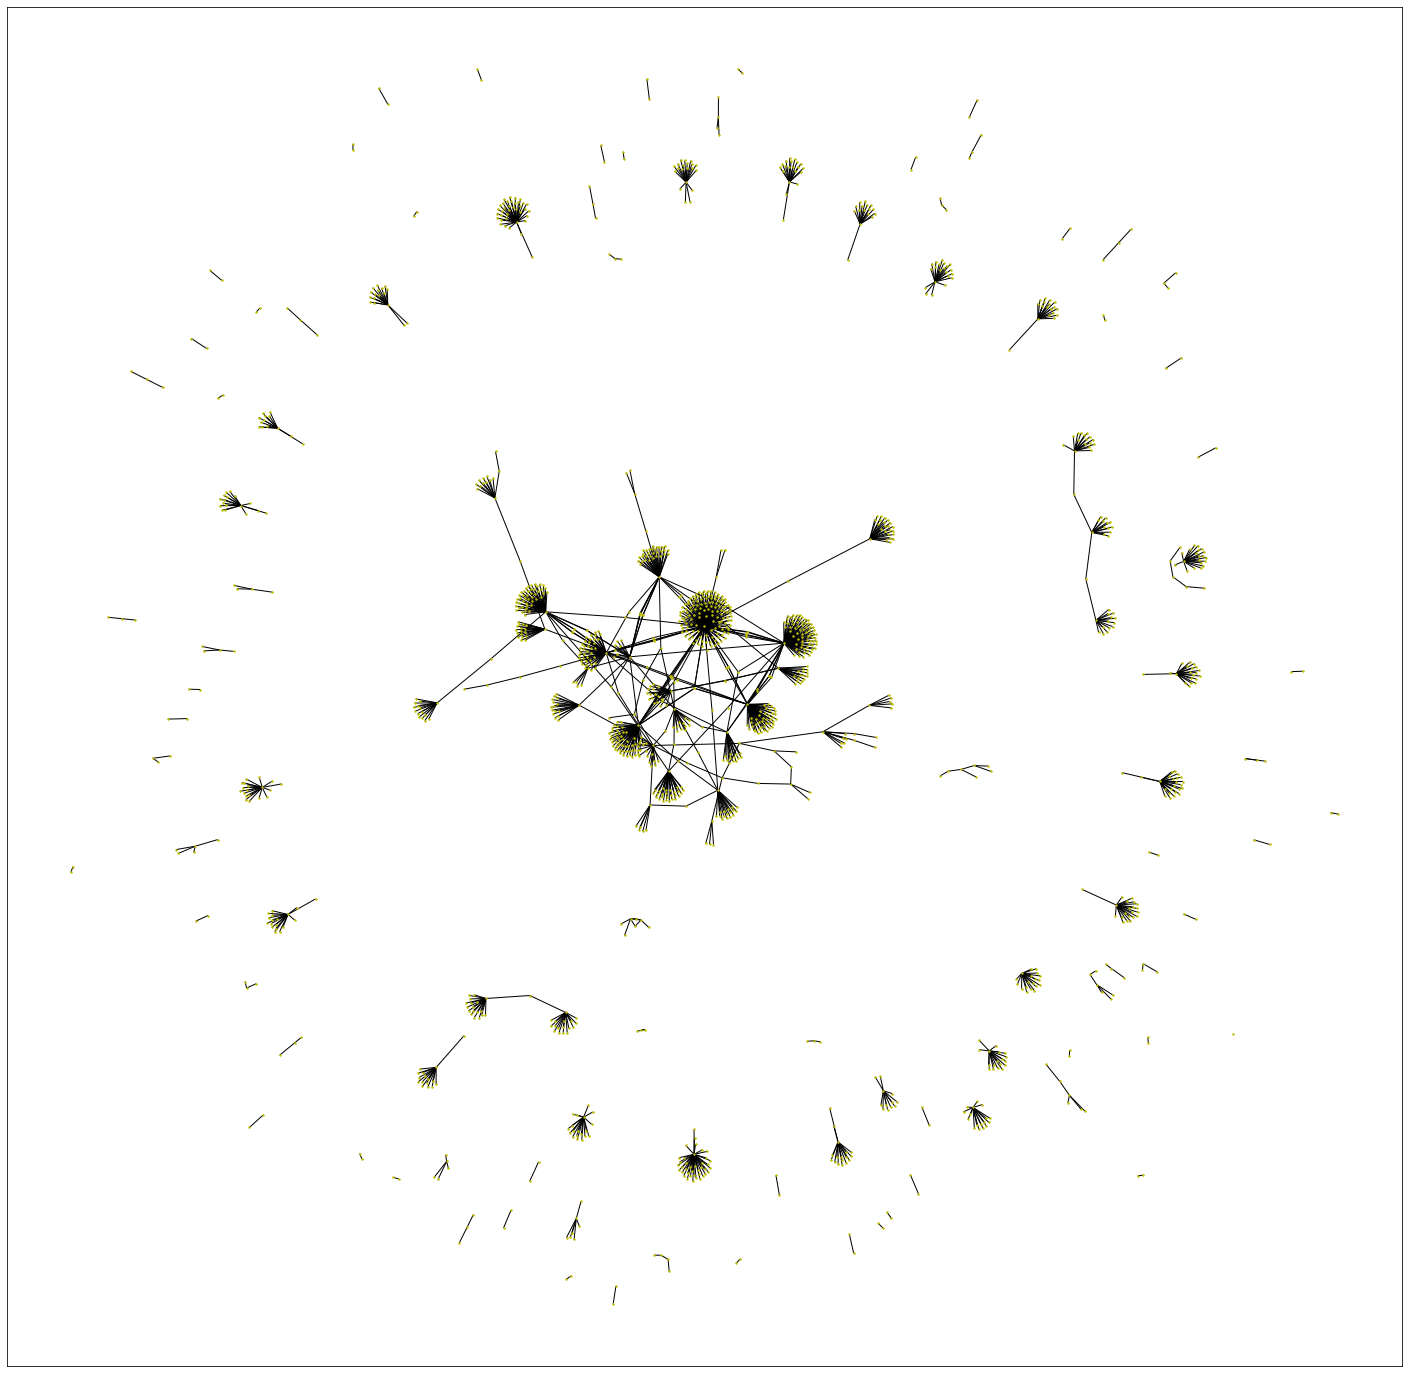

In [63]:
# Visualization with nx.draw_networkx
plt.figure(figsize=(25,25))
nx.draw_networkx(G, with_labels=False, node_color='y', node_size=2)
plt.show()

### * Analysis
* Degree of centrality
* Influencer
* Most important conection
* Best betweener
* Shortest path

In [64]:
nx.degree(G)

DegreeView({'PeterEgan6': 30, 'eve9tmp': 1, 'Victori45792596': 1, 'NathaliePhilli5': 1, 'flloydthecat': 1, '4N1m4l_l0v3R': 1, 'ELAINEDAVIES2': 1, 'MariaOD05737730': 1, 'Bertietheking': 2, 'Nightswan_1': 1, 'LindsjoLotta': 2, 'gudi27': 1, 'chellleington': 1, 'mariagreenie': 3, 'Jan_Leeming': 1, 'Mastino1111': 1, 'Skeez73691291': 1, 'RosemaryLedger': 1, 'bibichase': 1, '77deedd': 1, 'GTK17107134': 1, 'siwarr5': 1, 'euanfar': 1, 'powera372': 1, 'BookzDoctor': 1, 'KatWhyte2': 1, 'LyndaMa15321927': 1, 'Moehoffenstein': 1, 'ANoiLaParola': 1, 'RowenaKirkpatr5': 1, 'goodandthegreat': 1, 'PETAUK': 84, 'thegaudidragon': 2, 'LancelotLinkSpy': 1, 'toranada': 1, 'MarieDIAS7': 3, 'CoolUkbreez': 1, 'Eire353': 1, 'AviFlyGirl': 1, 'KayeAlfie': 1, 'SevgiEkmekciler': 1, 'kirthurgan': 1, 'mokomokai': 1, 'Superalimentos': 1, 'YarosisNancy': 1, 'animalpenpals': 1, 'NicheTax': 1, 'healing_energy4': 1, 'pati_qs': 1, 'peta': 158, 'Ewa53013872': 1, 'mongoose409': 2, 'fiddy333': 1, 'Elizabeth_NL': 2, 'fatihyenil

In [67]:
nx.degree(G, 'peta')

158

In [66]:
pd.DataFrame(data=nx.degree(G)).sort_values(by=1, ascending=False)

0    1
49               peta  158
31             PETAUK   84
1047  MercyForAnimals   60
839   TheVeganSociety   57
121     IngridNewkirk   54
774    PlantBasedNews   53
229     veganoutreach   43
818     RecordingAcad   38
662        CoryBooker   36
0          PeterEgan6   30
710    heavenskincare   23
686         jannarden   23
290       researchmrx   21
452           FARMUSA   21
1150       APompliano   20
446         VeganPoet   20
1238          GadSaad   20
80          missmayim   20
1382      ErikSolheim   19
101          richroll   19
1467       nipunmarya   19
1273        SuzyPelta   19
604    RealSpikeCohen   19
1081   thelittleidiot   19
1203          nytimes   18
643      TheSocialCTV   18
1304         PETAAsia   18
1099     DrDomPimenta   18
624    Imani_Barbarin   18
962    Nigella_Lawson   18
...               ...  ...
534       SmoothieCUK    1
533       nataliaelef    1
532           VassaeO    1
530   DHender27099516    1
527   HeroOfAllAliens    1
525      NayioArtisan    1
524      WendyESlater    1
523    devin_salesman    1
549   JMClark64684013    1
555   jermain25146374    1
578      maggieshayne    1
556        AndyNakrin    1
576    kellymcmaster4    1
575   allergymumscouk    1
574     Sammie323Blue    1
573          logicBFF    1
571       floralovbot    1
570           ryl5858    1
569      tripleplates    1
568      hellofrifran    1
565           elokjkk    1
564    Nelson49089572    1
563          novinzo1    1
562   Violeta85774767    1
561           laiswov    1
560   FurduncinhoOfc0    1
559      a_stephannyy    1
558     Mr_lorranbr34    1
557    AlexMitcheller    1
1488  RohitYa26275274    1

[1489 rows x 2 columns]

* Degree Centrality

### * Degree centrality

In [69]:
nx.degree_centrality(G)

{'PeterEgan6': 0.020161290322580648,
 'eve9tmp': 0.0006720430107526882,
 'Victori45792596': 0.0006720430107526882,
 'NathaliePhilli5': 0.0006720430107526882,
 'flloydthecat': 0.0006720430107526882,
 '4N1m4l_l0v3R': 0.0006720430107526882,
 'ELAINEDAVIES2': 0.0006720430107526882,
 'MariaOD05737730': 0.0006720430107526882,
 'Bertietheking': 0.0013440860215053765,
 'Nightswan_1': 0.0006720430107526882,
 'LindsjoLotta': 0.0013440860215053765,
 'gudi27': 0.0006720430107526882,
 'chellleington': 0.0006720430107526882,
 'mariagreenie': 0.0020161290322580645,
 'Jan_Leeming': 0.0006720430107526882,
 'Mastino1111': 0.0006720430107526882,
 'Skeez73691291': 0.0006720430107526882,
 'RosemaryLedger': 0.0006720430107526882,
 'bibichase': 0.0006720430107526882,
 '77deedd': 0.0006720430107526882,
 'GTK17107134': 0.0006720430107526882,
 'siwarr5': 0.0006720430107526882,
 'euanfar': 0.0006720430107526882,
 'powera372': 0.0006720430107526882,
 'BookzDoctor': 0.0006720430107526882,
 'KatWhyte2': 0.000672043

In [70]:
sorted(nx.degree_centrality(G).values(), reverse=True)

[0.10618279569892473,
 0.05645161290322581,
 0.040322580645161296,
 0.038306451612903226,
 0.036290322580645164,
 0.035618279569892476,
 0.028897849462365593,
 0.025537634408602152,
 0.024193548387096777,
 0.020161290322580648,
 0.01545698924731183,
 0.01545698924731183,
 0.014112903225806453,
 0.014112903225806453,
 0.013440860215053765,
 0.013440860215053765,
 0.013440860215053765,
 0.013440860215053765,
 0.012768817204301076,
 0.012768817204301076,
 0.012768817204301076,
 0.012768817204301076,
 0.012768817204301076,
 0.012768817204301076,
 0.012096774193548388,
 0.012096774193548388,
 0.012096774193548388,
 0.012096774193548388,
 0.012096774193548388,
 0.012096774193548388,
 0.0114247311827957,
 0.0114247311827957,
 0.0114247311827957,
 0.0114247311827957,
 0.0114247311827957,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043012,
 0.010752688172043012,
 0.010080645161290324,
 0.010080645161290324,
 0.010080645161290324,
 0.009408602150537635,
 0

In [71]:
most_influential = nx.degree_centrality(G)
for id_tw in sorted(most_influential, key=most_influential.get, reverse=True):
    print('Influencer: ', id_tw, ' -> Centrality: ', most_influential[id_tw])

Influencer:  peta  -> Centrality:  0.10618279569892473
Influencer:  PETAUK  -> Centrality:  0.05645161290322581
Influencer:  MercyForAnimals  -> Centrality:  0.040322580645161296
Influencer:  TheVeganSociety  -> Centrality:  0.038306451612903226
Influencer:  IngridNewkirk  -> Centrality:  0.036290322580645164
Influencer:  PlantBasedNews  -> Centrality:  0.035618279569892476
Influencer:  veganoutreach  -> Centrality:  0.028897849462365593
Influencer:  RecordingAcad  -> Centrality:  0.025537634408602152
Influencer:  CoryBooker  -> Centrality:  0.024193548387096777
Influencer:  PeterEgan6  -> Centrality:  0.020161290322580648
Influencer:  jannarden  -> Centrality:  0.01545698924731183
Influencer:  heavenskincare  -> Centrality:  0.01545698924731183
Influencer:  researchmrx  -> Centrality:  0.014112903225806453
Influencer:  FARMUSA  -> Centrality:  0.014112903225806453
Influencer:  missmayim  -> Centrality:  0.013440860215053765
Influencer:  VeganPoet  -> Centrality:  0.013440860215053765


Influencer:  rolanjohnson_ca  -> Centrality:  0.0006720430107526882
Influencer:  Samaelle2  -> Centrality:  0.0006720430107526882
Influencer:  jakeyapp  -> Centrality:  0.0006720430107526882
Influencer:  naturallyCDG  -> Centrality:  0.0006720430107526882
Influencer:  SiegelandB  -> Centrality:  0.0006720430107526882
Influencer:  gumkenth  -> Centrality:  0.0006720430107526882
Influencer:  LegacyWM1  -> Centrality:  0.0006720430107526882
Influencer:  tkt058  -> Centrality:  0.0006720430107526882
Influencer:  gracious_mi  -> Centrality:  0.0006720430107526882
Influencer:  Thenaturesco  -> Centrality:  0.0006720430107526882
Influencer:  Natasha38362828  -> Centrality:  0.0006720430107526882
Influencer:  RodMacedaXXX  -> Centrality:  0.0006720430107526882
Influencer:  AshimJChoudhury  -> Centrality:  0.0006720430107526882
Influencer:  facuczn  -> Centrality:  0.0006720430107526882
Influencer:  idklizzie  -> Centrality:  0.0006720430107526882
Influencer:  According2Ash  -> Centrality:  0.0

Influencer:  _full_stack  -> Centrality:  0.0006720430107526882
Influencer:  JanesAmethyst  -> Centrality:  0.0006720430107526882
Influencer:  Helena1031  -> Centrality:  0.0006720430107526882
Influencer:  Nana3x2  -> Centrality:  0.0006720430107526882
Influencer:  Giulia_Giunta  -> Centrality:  0.0006720430107526882
Influencer:  javashipcoffee  -> Centrality:  0.0006720430107526882
Influencer:  LynnWiberg  -> Centrality:  0.0006720430107526882
Influencer:  veganme_uk  -> Centrality:  0.0006720430107526882
Influencer:  geo_wa  -> Centrality:  0.0006720430107526882
Influencer:  MxActivista  -> Centrality:  0.0006720430107526882
Influencer:  frank3davies  -> Centrality:  0.0006720430107526882
Influencer:  pocketbelt  -> Centrality:  0.0006720430107526882
Influencer:  citruslady  -> Centrality:  0.0006720430107526882
Influencer:  SLATFascists  -> Centrality:  0.0006720430107526882
Influencer:  PitYackerLee  -> Centrality:  0.0006720430107526882
Influencer:  SoundThom  -> Centrality:  0.00

In [86]:
pd.DataFrame.from_dict(data=nx.degree_centrality(G), orient='index').sort_values(by=0, ascending=False)

0
peta             0.106183
PETAUK           0.056452
MercyForAnimals  0.040323
TheVeganSociety  0.038306
IngridNewkirk    0.036290
PlantBasedNews   0.035618
veganoutreach    0.028898
RecordingAcad    0.025538
CoryBooker       0.024194
PeterEgan6       0.020161
heavenskincare   0.015457
jannarden        0.015457
researchmrx      0.014113
FARMUSA          0.014113
APompliano       0.013441
VeganPoet        0.013441
GadSaad          0.013441
missmayim        0.013441
ErikSolheim      0.012769
richroll         0.012769
nipunmarya       0.012769
SuzyPelta        0.012769
RealSpikeCohen   0.012769
thelittleidiot   0.012769
nytimes          0.012097
TheSocialCTV     0.012097
PETAAsia         0.012097
DrDomPimenta     0.012097
Imani_Barbarin   0.012097
Nigella_Lawson   0.012097
...                   ...
SmoothieCUK      0.000672
nataliaelef      0.000672
VassaeO          0.000672
DHender27099516  0.000672
HeroOfAllAliens  0.000672
NayioArtisan     0.000672
WendyESlater     0.000672
devin_salesman   0.000672
JMClark64684013  0.000672
jermain25146374  0.000672
maggieshayne     0.000672
AndyNakrin       0.000672
kellymcmaster4   0.000672
allergymumscouk  0.000672
Sammie323Blue    0.000672
logicBFF         0.000672
floralovbot      0.000672
ryl5858          0.000672
tripleplates     0.000672
hellofrifran     0.000672
elokjkk          0.000672
Nelson49089572   0.000672
novinzo1         0.000672
Violeta85774767  0.000672
laiswov          0.000672
FurduncinhoOfc0  0.000672
a_stephannyy     0.000672
Mr_lorranbr34    0.000672
AlexMitcheller   0.000672
RohitYa26275274  0.000672

[1489 rows x 1 columns]

### * Eigenvector centrality

In [87]:
## Most importat conection
nx.eigenvector_centrality(G)

{'PeterEgan6': 0.0006649621614819123,
 'eve9tmp': 5.088749559577233e-05,
 'Victori45792596': 5.088749559577233e-05,
 'NathaliePhilli5': 5.088749559577233e-05,
 'flloydthecat': 5.088749559577233e-05,
 '4N1m4l_l0v3R': 5.088749559577233e-05,
 'ELAINEDAVIES2': 5.088749559577233e-05,
 'MariaOD05737730': 5.088749559577233e-05,
 'Bertietheking': 0.0005707131009268663,
 'Nightswan_1': 5.088749559577233e-05,
 'LindsjoLotta': 0.0050631873583000635,
 'gudi27': 5.088749559577233e-05,
 'chellleington': 5.088749559577233e-05,
 'mariagreenie': 0.0016796240846143995,
 'Jan_Leeming': 5.088749559577233e-05,
 'Mastino1111': 5.088749559577233e-05,
 'Skeez73691291': 5.088749559577233e-05,
 'RosemaryLedger': 5.088749559577233e-05,
 'bibichase': 5.088749559577233e-05,
 '77deedd': 5.088749559577233e-05,
 'GTK17107134': 5.088749559577233e-05,
 'siwarr5': 5.088749559577233e-05,
 'euanfar': 5.088749559577233e-05,
 'powera372': 5.088749559577233e-05,
 'BookzDoctor': 5.088749559577233e-05,
 'KatWhyte2': 5.08874955

In [88]:
most_impor_conection = nx.eigenvector_centrality(G)
type(most_impor_conection)

dict

In [89]:
for id_tw in sorted(most_impor_conection, key=most_impor_conection.get, reverse=True):
    print('Connector', id_tw, ' -> Connection', most_impor_conection[id_tw])

Connector peta  -> Connection 0.7143659450329316
Connector PETAUK  -> Connection 0.06549781806942225
Connector FaribaParniani  -> Connection 0.06144728233481587
Connector CyndyPartyOf5  -> Connection 0.06144728233481587
Connector ra_mc  -> Connection 0.060665278677862776
Connector Mercede65952900  -> Connection 0.06019815365017464
Connector emilyyy_rose97  -> Connection 0.05968032455215588
Connector giselamv8282  -> Connection 0.05968032455215588
Connector kat_pep_  -> Connection 0.05968032455215588
Connector Macheath1  -> Connection 0.05968032455215588
Connector theresemiket  -> Connection 0.05968032455215588
Connector Leafs4E  -> Connection 0.05883432075859866
Connector mongoose409  -> Connection 0.058314495153267566
Connector Calendula2016  -> Connection 0.058314495153267566
Connector brassa11  -> Connection 0.058314495153267566
Connector julietjohns  -> Connection 0.058314495153267566
Connector Elizabeth_NL  -> Connection 0.05780081187099989
Connector schmoozequeen  -> Connection 0

Connector STENCHRADIO  -> Connection 8.356427890758973e-05
Connector TheSkepticalV  -> Connection 8.356427890758973e-05
Connector SUMNERWJILL  -> Connection 8.356427890758973e-05
Connector JulioangelE  -> Connection 8.356427890758973e-05
Connector slovely31  -> Connection 8.356427890758973e-05
Connector savyasachi2020  -> Connection 8.356427890758973e-05
Connector pennyfrs  -> Connection 8.356427890758973e-05
Connector OutReachDude  -> Connection 8.356427890758973e-05
Connector peaches1200  -> Connection 8.356427890758973e-05
Connector zevbaldwin  -> Connection 8.356427890758973e-05
Connector SuzyPelta  -> Connection 8.221189524170212e-05
Connector CASanctuary  -> Connection 7.435628806391638e-05
Connector PetaIndia  -> Connection 5.402276446555195e-05
Connector eve9tmp  -> Connection 5.088749559577233e-05
Connector Victori45792596  -> Connection 5.088749559577233e-05
Connector NathaliePhilli5  -> Connection 5.088749559577233e-05
Connector flloydthecat  -> Connection 5.088749559577233e

Connector MaryamNou7y  -> Connection 2.2702344864815268e-20
Connector amina_writes  -> Connection 2.2702344864815268e-20
Connector Plankton1975  -> Connection 2.2702344864815268e-20
Connector snippe295_kay  -> Connection 2.2702344864815268e-20
Connector CaraGalka  -> Connection 2.2702344864815268e-20
Connector WFAicher  -> Connection 2.2702344864815268e-20
Connector triangle_toast  -> Connection 2.2702344864815268e-20
Connector JoeyMaier  -> Connection 2.2702344864815268e-20
Connector Matthew_NCC1701  -> Connection 2.2702344864815268e-20
Connector slimhackett  -> Connection 2.2702344864815268e-20
Connector tim_brannigan  -> Connection 2.2702344864815268e-20
Connector 20SM_NJ  -> Connection 2.2702344864815268e-20
Connector philipjdoyle  -> Connection 2.2702344864815268e-20
Connector awshasha  -> Connection 1.2346165396033419e-20
Connector kitmtorres  -> Connection 1.2346165396033419e-20
Connector Ashes6906  -> Connection 1.2346165396033419e-20
Connector cajunscientific  -> Connection 1.

In [90]:
pd.DataFrame.from_dict(data=nx.eigenvector_centrality(G), orient='index').sort_values(by=0, ascending=False)

0
peta             7.143659e-01
PETAUK           6.549782e-02
CyndyPartyOf5    6.144728e-02
FaribaParniani   6.144728e-02
ra_mc            6.066528e-02
Mercede65952900  6.019815e-02
emilyyy_rose97   5.968032e-02
giselamv8282     5.968032e-02
Macheath1        5.968032e-02
kat_pep_         5.968032e-02
theresemiket     5.968032e-02
Leafs4E          5.883432e-02
mongoose409      5.831450e-02
Calendula2016    5.831450e-02
brassa11         5.831450e-02
julietjohns      5.831450e-02
LOVE_CATS_ONE    5.780081e-02
schmoozequeen    5.780081e-02
Elizabeth_NL     5.780081e-02
createtime_      5.674857e-02
ramondeavila     5.674857e-02
AfLadyhawk       5.674857e-02
Wolf_Girl_Yulia  5.674857e-02
DrdaveAnddee     5.562238e-02
urbangenii       5.562238e-02
faktchekker      5.531604e-02
BODYBYLlON       5.531181e-02
GaiaPluto        5.505839e-02
ZoieFanAnna2     5.503809e-02
jesseimae        5.466802e-02
...                       ...
elda_dc          1.756509e-36
TraceyKleber     1.756509e-36
toward_vegan     1.756509e-36
aniket_anikett   1.756509e-36
Chelsea54485054  1.756509e-36
brujamiope       1.756509e-36
UBEREATSCODE6    1.756509e-36
DoorDas93195685  1.756509e-36
_diamondblak     1.756509e-36
SustainTrends    1.756509e-36
StacyeBranche    1.756509e-36
LovMusic11       1.756509e-36
cloudwaterbrew   1.756509e-36
SmoothieCUK      1.756509e-36
veganfoodliving  1.756509e-36
kellymcmaster4   1.756509e-36
Modomnoc1        1.756509e-36
Veggie_Inspired  1.756509e-36
LiveToEatHere    1.756509e-36
Oneworldnews_    1.756509e-36
Anayr7           1.756509e-36
jananaayakan     1.756509e-36
thisisSamaran    1.756509e-36
HawksBestie      1.756509e-36
rawrrbaby        1.756509e-36
fanoftheanimals  1.756509e-36
gartenzwerg333   1.756509e-36
DiningCooking    1.756509e-36
allergymumscouk  1.756509e-36
RohitYa26275274  1.756509e-36

[1489 rows x 1 columns]

### * shortest Path

In [92]:
## Shortest Path
nx.shortest_path(G, 'peta')

{'peta': ['peta'],
 'Ewa53013872': ['peta', 'Ewa53013872'],
 'mongoose409': ['peta', 'mongoose409'],
 'fiddy333': ['peta', 'fiddy333'],
 'Elizabeth_NL': ['peta', 'Elizabeth_NL'],
 'fatihyenilmez5': ['peta', 'fatihyenilmez5'],
 'sherielk': ['peta', 'sherielk'],
 'createtime_': ['peta', 'createtime_'],
 'Carolinakitikin': ['peta', 'Carolinakitikin'],
 'Giovannaconfal6': ['peta', 'Giovannaconfal6'],
 'OssoffWarnockGA': ['peta', 'OssoffWarnockGA'],
 'faktchekker': ['peta', 'faktchekker'],
 'IFannyy': ['peta', 'IFannyy'],
 'QueensOfWarrior': ['peta', 'QueensOfWarrior'],
 'jesseimae': ['peta', 'jesseimae'],
 'melissaaramini': ['peta', 'melissaaramini'],
 'ortizjr_v': ['peta', 'ortizjr_v'],
 'FlattenRose': ['peta', 'FlattenRose'],
 'carlos8386': ['peta', 'carlos8386'],
 'ivansmom60': ['peta', 'ivansmom60'],
 'DrdaveAnddee': ['peta', 'DrdaveAnddee'],
 'fresuchas': ['peta', 'fresuchas'],
 'digitalangie': ['peta', 'digitalangie'],
 'KhamaAnku': ['peta', 'KhamaAnku'],
 'MartinEnriquePe': ['peta',

In [95]:
nx.shortest_path(G, 'peta', 'Astraea_Styx')

['peta', 'CyndyPartyOf5', 'MercyForAnimals', 'Astraea_Styx']

In [96]:
def path(graph, a, b):
    try: return(nx.shortest_path(graph, a, b))
    except: return('no path between')

In [97]:
graph = G
a = 'peta'
b = 'AllegraHarvey16'
path(graph, a, b)

['peta', 'CyndyPartyOf5', 'MercyForAnimals', 'AllegraHarvey16']

### * Betweener centrality

C:\Users\41763\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


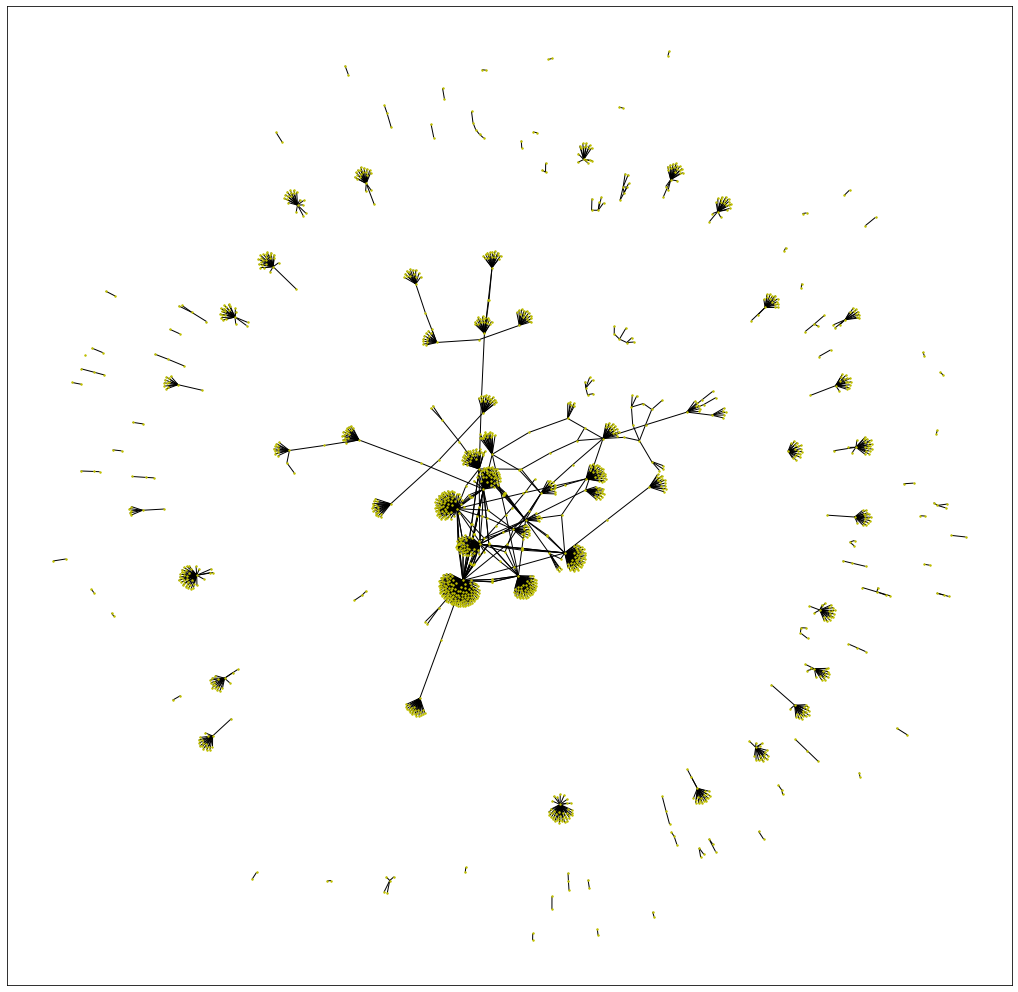

In [101]:
## Betweener Centrality
plt.figure(figsize=(18,18))
nx.draw_networkx(G, with_labels=False, node_color='y', node_size=2)
plt.show()

In [102]:
best_connector = nx.betweenness_centrality(G)
for id_tw in sorted(best_connector, key=best_connector.get, reverse=True):
    print('Best Connector: ', id_tw, ' -> Betweenes', best_connector[id_tw])

Best Connector:  peta  -> Betweenes 0.11124159013882981
Best Connector:  FARMUSA  -> Betweenes 0.06514094564167904
Best Connector:  PETAUK  -> Betweenes 0.060239442268162
Best Connector:  IngridNewkirk  -> Betweenes 0.05244966009136393
Best Connector:  veganoutreach  -> Betweenes 0.04738795083092429
Best Connector:  TheVeganSociety  -> Betweenes 0.04039811612306215
Best Connector:  MercyForAnimals  -> Betweenes 0.038307918056474564
Best Connector:  PlantBasedNews  -> Betweenes 0.03704484952287159
Best Connector:  Change  -> Betweenes 0.033619639150537256
Best Connector:  researchmrx  -> Betweenes 0.03265618309347436
Best Connector:  ra_mc  -> Betweenes 0.02362458490220976
Best Connector:  TRVST_Eco  -> Betweenes 0.02297329544221967
Best Connector:  SuzyPelta  -> Betweenes 0.02275048629339581
Best Connector:  StopEatingAnim1  -> Betweenes 0.02053640511674657
Best Connector:  thelittleidiot  -> Betweenes 0.020260718340311373
Best Connector:  PeterEgan6  -> Betweenes 0.018538775594556012


Best Connector:  jakeyapp  -> Betweenes 0.0
Best Connector:  naturallyCDG  -> Betweenes 0.0
Best Connector:  SiegelandB  -> Betweenes 0.0
Best Connector:  gumkenth  -> Betweenes 0.0
Best Connector:  LegacyWM1  -> Betweenes 0.0
Best Connector:  tkt058  -> Betweenes 0.0
Best Connector:  gracious_mi  -> Betweenes 0.0
Best Connector:  Thenaturesco  -> Betweenes 0.0
Best Connector:  Natasha38362828  -> Betweenes 0.0
Best Connector:  RodMacedaXXX  -> Betweenes 0.0
Best Connector:  AshimJChoudhury  -> Betweenes 0.0
Best Connector:  facuczn  -> Betweenes 0.0
Best Connector:  idklizzie  -> Betweenes 0.0
Best Connector:  According2Ash  -> Betweenes 0.0
Best Connector:  GissEilish  -> Betweenes 0.0
Best Connector:  TVObsesssed  -> Betweenes 0.0
Best Connector:  shaelynmiche  -> Betweenes 0.0
Best Connector:  theecza  -> Betweenes 0.0
Best Connector:  vanntzer  -> Betweenes 0.0
Best Connector:  LyssaLovesKesha  -> Betweenes 0.0
Best Connector:  diceasese  -> Betweenes 0.0
Best Connector:  finneas 

Best Connector:  Corina_Marti  -> Betweenes 0.0
Best Connector:  swtkookie01_21  -> Betweenes 0.0
Best Connector:  YOUNGT51094268  -> Betweenes 0.0
Best Connector:  houstonmadegal_  -> Betweenes 0.0
Best Connector:  Sumebe904  -> Betweenes 0.0
Best Connector:  LeendorM  -> Betweenes 0.0
Best Connector:  solomoncooper10  -> Betweenes 0.0
Best Connector:  AyethAlqhhtani1  -> Betweenes 0.0
Best Connector:  emoglitterpop  -> Betweenes 0.0
Best Connector:  Jeffrey98057267  -> Betweenes 0.0
Best Connector:  BeatByMariahB  -> Betweenes 0.0
Best Connector:  julstheebarbie  -> Betweenes 0.0
Best Connector:  TemaBoy__  -> Betweenes 0.0
Best Connector:  hyung_javiera  -> Betweenes 0.0
Best Connector:  IamTabithaBrown  -> Betweenes 0.0
Best Connector:  AndrewFaulkner9  -> Betweenes 0.0
Best Connector:  closetscorpio  -> Betweenes 0.0
Best Connector:  rottipotti  -> Betweenes 0.0
Best Connector:  CookVeganForMe  -> Betweenes 0.0
Best Connector:  JuricanV  -> Betweenes 0.0
Best Connector:  STENCHRAD

Best Connector:  patsy_jw  -> Betweenes 0.0
Best Connector:  Carly20152265  -> Betweenes 0.0
Best Connector:  FredBlaset  -> Betweenes 0.0
Best Connector:  Thelagosveganf1  -> Betweenes 0.0
Best Connector:  Laine67492718  -> Betweenes 0.0
Best Connector:  LiaColombo1  -> Betweenes 0.0
Best Connector:  PK48324087  -> Betweenes 0.0
Best Connector:  SmallWhiteDog4  -> Betweenes 0.0
Best Connector:  Hasso46  -> Betweenes 0.0
Best Connector:  pepe_nature  -> Betweenes 0.0
Best Connector:  sevsahin21  -> Betweenes 0.0
Best Connector:  ThuraiMoorthy  -> Betweenes 0.0
Best Connector:  Marek_PK  -> Betweenes 0.0
Best Connector:  KishandaKish  -> Betweenes 0.0
Best Connector:  ADRIANAMTZ4  -> Betweenes 0.0
Best Connector:  Lusalane  -> Betweenes 0.0
Best Connector:  grifone92  -> Betweenes 0.0
Best Connector:  LillaW35103450  -> Betweenes 0.0
Best Connector:  Praesensabsens  -> Betweenes 0.0
Best Connector:  LisaLisaw1  -> Betweenes 0.0
Best Connector:  Petbunny4  -> Betweenes 0.0
Best Connector

In [104]:
pd.DataFrame.from_dict(data=nx.betweenness_centrality(G), orient='index').sort_values(by=0, ascending=False)

0
peta             0.111242
FARMUSA          0.065141
PETAUK           0.060239
IngridNewkirk    0.052450
veganoutreach    0.047388
TheVeganSociety  0.040398
MercyForAnimals  0.038308
PlantBasedNews   0.037045
Change           0.033620
researchmrx      0.032656
ra_mc            0.023625
TRVST_Eco        0.022973
SuzyPelta        0.022750
StopEatingAnim1  0.020536
thelittleidiot   0.020261
PeterEgan6       0.018539
VeganPoet        0.017862
BODYBYLlON       0.017462
ChubbieVegan     0.016304
ZoieFanAnna2     0.014948
jannarden        0.014526
mariagreenie     0.012929
missmayim        0.012782
mimib85092099    0.011532
TheSocialCTV     0.010609
VeganBot1        0.010593
YvonneHooper20   0.009857
PETAAsia         0.009386
PetaIndia        0.009295
CyndyPartyOf5    0.009233
...                   ...
nataliaelef      0.000000
VassaeO          0.000000
DHender27099516  0.000000
HeroOfAllAliens  0.000000
NayioArtisan     0.000000
WendyESlater     0.000000
devin_salesman   0.000000
federicomazand9  0.000000
VPanchamukhi     0.000000
BrandBlurb2020   0.000000
logicBFF         0.000000
crowd_ranger     0.000000
floralovbot      0.000000
ryl5858          0.000000
tripleplates     0.000000
hellofrifran     0.000000
dmainguycom      0.000000
elokjkk          0.000000
Nelson49089572   0.000000
novinzo1         0.000000
Violeta85774767  0.000000
laiswov          0.000000
FurduncinhoOfc0  0.000000
a_stephannyy     0.000000
Mr_lorranbr34    0.000000
AlexMitcheller   0.000000
AndyNakrin       0.000000
jermain25146374  0.000000
m_adil80         0.000000
RohitYa26275274  0.000000

[1489 rows x 1 columns]

### Sub-groups

In [106]:
group1 = nx.bfs_tree(G, 'peta')

In [108]:
group2 = nx.bfs_tree(G, 'TheVeganSociety')

In [109]:
group3 = nx.bfs_tree(G, 'nytimes')

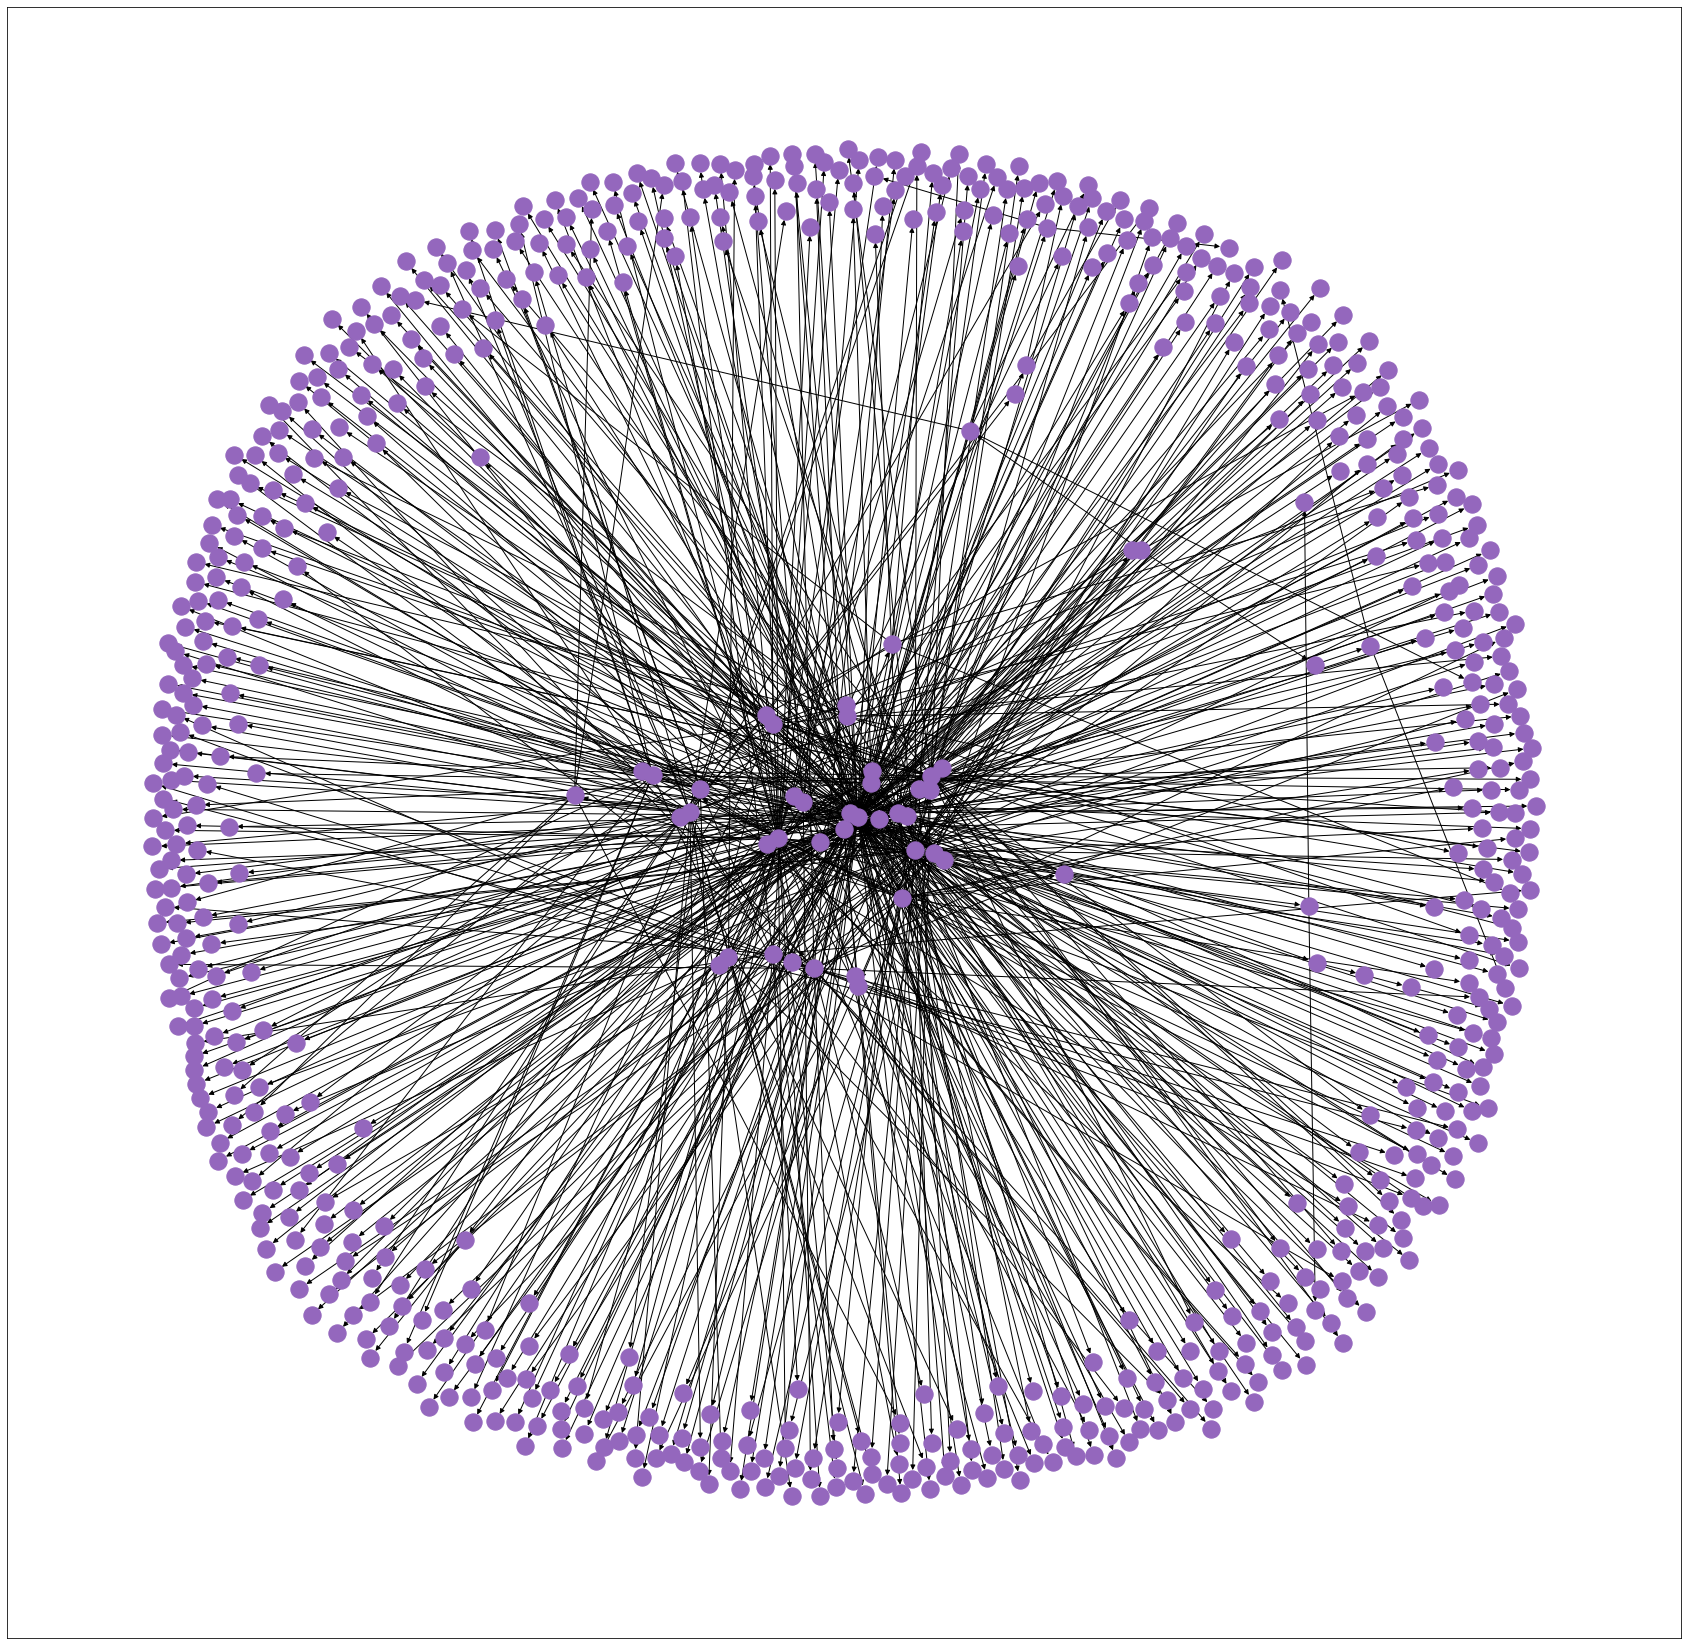

In [117]:
group = group2
plt.figure(figsize=(30,30))
nx.draw_networkx(group, with_labels=False, node_color='tab:purple')
plt.show()

In [113]:
nx.node_connected_component(G,"peta")

{'1seekthetruth',
 '30daysinth3hol3',
 '3MARIO6HUGO9',
 '3wishesat40',
 '4N1m4l_l0v3R',
 '4abetterworld',
 '77deedd',
 '8Kstudios',
 'ADRIANAMTZ4',
 'AHO888world',
 'ANoiLaParola',
 'APASDEM',
 'Aandy444',
 'Aarjavjain2Jain',
 'AbhayPa56326951',
 'AdamLeeD',
 'AdolphO07',
 'AerisSith',
 'AfLadyhawk',
 'Afterstorm13',
 'AhimsaEdu',
 'AhimsaRising',
 'AjayKum66903995',
 'Ale6altrove',
 'AleRichmondok',
 'Alicia_A77',
 'AllegraHarvey16',
 'AllianceEthique',
 'AllicatMonster',
 'Amaya1911811244',
 'Amystis_',
 'AnAnonymous_Guy',
 'Ana84753',
 'Analima_alef',
 'AndrewFaulkner9',
 'AngelaPort20',
 'Angela_s_tweets',
 'Anita73874109',
 'AnitaPokhriyal1',
 'Apaulnally',
 'ArzooSorathiya',
 'AshishV36337284',
 'Astraea_Styx',
 'AuthorSBennett',
 'AviFlyGirl',
 'BODYBYLlON',
 'Bailey285133190',
 'BeachCat0201',
 'BelaContessa',
 'Bertietheking',
 'Bhartiy93334860',
 'BlckVgns',
 'Bombolleta_',
 'BookzDoctor',
 'Bron1954',
 'ButterTaeEffect',
 'ByronMurphy8',
 'CASanctuary',
 'COckletree',
 'Cale

In [ ]:
df.columns

In [ ]:
edges = df[['user_name_x', 'user_name_y', 'followers_count_y']]
edges

In [ ]:
user_y = 'MRX'
edges.loc[edges['user_name_y']==user_y]

In [ ]:
edges = df[['user_name_x', 'user_name_y', 'followers_count_y']]
edges_group = edges.groupby('user_name_x')['user_name_y'].count().sort_values(ascending=False)
edges_group

In [ ]:
followers = nx.get_edge_attributes(G, 'followers_count_y')
followers

In [ ]:
print(f"Number of Nodes: {G.number_of_nodes()}")
print(*G.nodes(data=True), sep="\n")

In [ ]:
print(f"Number of Nodes: {G.number_of_edges()}")
print(*G.edges(data=False), sep="\n")

In [ ]:
# Information about one Node
nx.info(G, 'MRX')

In [ ]:
# Information between two Nodes/Edges
G.edges['MRX', 'Ladylia257']

In [ ]:
G.neighbors('MRX')

### * Ein Network Graph neu erstellen

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
for c in df.columns:
    print(df[col])

In [ ]:
for i in df.index:
    print(i)

In [ ]:
network = nx.Graph(name='Twitter_Graph')

In [ ]:
for i in df.index:
    network.add_node(i,tweet_id_x=df['tweet_id_x'],location_x=df['location_x'],description_x=df['location_x'],followers_count_x=df['followers_count_x'])

In [ ]:
network.add_edge()

### Graphs in Gephi format